# Fusion Clean and Model CONUS

In [59]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import joblib


print(os.getcwd())
hucname = 'AllMatchups'
#huc = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/WQP/WQP_notAquasat/wqp_'+hucname+'_notAquasat_tss.csv')


/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS


In [60]:
file_list = glob.glob(os.path.join(hucname+'_data', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)

#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset=['red', 'date']).drop_duplicates(subset = ['SiteID', 'date'])
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)]

df['tss_log'] = np.log10(df['tss'])
df['GR2_log'] = np.log10(df['GR2'])

df['red_log'] = np.log10(df['red'])
df['green_log'] = np.log10(df['green'])
df['blue_log'] = np.log10(df['blue'])
df['nir_log'] = np.log10(df['nir'])
df['swir1_log'] = np.log10(df['swir1'])
df['swir2_log'] = np.log10(df['swir2'])
df['B_RG_log'] = np.log10(df['B_RG'])
df['TZID'] = 'UTC'
df['type'] = 'Stream'
#Fill in units as mg/l for rest
df['units'] = df['units'].fillna('mg/l') 
df['parameter'] = df['parameter'].fillna('Sediment') 
df['parameter_name'] = df['parameter_name'].fillna('tss') 
df['huc']= df.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

#Write it out
df.to_csv(r'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')


df = df.drop(['Unnamed: 0', 'dswe', 'dswe_sd','date_only', 'value', 'status', 'particle_size', 'sample_depth', 'sample_depth_unit'], axis =1)

print(df.columns.values.tolist())
print((df.SiteID.nunique()))
print(df.shape[0])

['Unnamed: 0.1', 'date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'date_time', 'media', 'fraction', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat', 'source', 'year', 'month', 'tss_log', 'B_RG_log', 'index', 'path', 'qa', 'qa_sd', 'row', 'endtime', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'date_utc', 'clouds', 'timediff', 'pwater', 'type', 'sceneID', 'R_GB_log', 'hillshade'

In [61]:
#Turn sat into a categorical variable
# Define the function to apply to the new 'sat' column
def get_sat(satID):
    if satID == 5.0:
        return str('L5')
    elif satID == 7.0:
        return str('L7')
    elif satID == 8.0:
        return str('L8')
    elif satID == 9.0:
        return str('L9')
    elif satID == 2.0:
        return str('S2')
    elif satID == 1.0:
        return str('F')
    else:
        return 'Other'

# Create a new column 'Region' based on the 'City' column
df['sat_cat'] = df['sat'].apply(lambda x: get_sat(x))
print(df.sat_cat.unique())
print(df.columns.values.tolist())


['F' 'L7' 'L5' 'L8' 'S2' 'L9']
['Unnamed: 0.1', 'date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'date_time', 'media', 'fraction', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat', 'source', 'year', 'month', 'tss_log', 'B_RG_log', 'index', 'path', 'qa', 'qa_sd', 'row', 'endtime', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'date_utc', 'clouds', 'timediff', 'pwater', 'type', 'sc

In [130]:
df = df[(df.tss < 250)]

In [131]:
#Prep data for one hot encoding

#Choose data columns of potential interest
df_slim = df[['parameter', 'SiteID', 'huc', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red', 
         'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 
         'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 
         'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 
         'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat_cat','year', 'month', 'tss_log', 'B_RG_log',
         'R_GB_log', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']]

# get the number of unique values in each column
unique_counts = df_slim[['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat','year', 'month', 'huc', 'NS_NR']].apply(pd.Series.unique)

# print the unique value counts
print(unique_counts)
print(df_slim.huc.unique())

parameter         [Suspended Sediment Concentration (SSC), Total...
parameter_name                                        [tss, p.sand]
units                                                     [mg/l, %]
Matchup                                      [Fusion, AquaSat, LS2]
sat_cat                                     [F, L7, L5, L8, S2, L9]
year              [2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...
month                       [3, 4, 5, 6, 7, 10, 11, 8, 9, 12, 2, 1]
huc               [5140206.0, 5010009.0, 5030104.0, 5090103.0, 5...
NS_NR             [0.3805470708963283, 0.3852870490931301, 0.368...
dtype: object
[ 5140206.  5010009.  5030104.  5090103.  5030101.  5020005.  5050001.
  5090201.  5030202.  5090101.  5140201.  5110005. 15030104. 15030101.
 15010002. 15030107. 15010008. 19020505. 19020503. 19030205.  6030002.
  6030001.  6040006.  6030005. 12030203. 12020003. 12090302. 12020006.
 12040101. 10300101. 10290203. 10270102. 10100004. 10230001. 10180008.
 10240001. 10160003

In [132]:
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_parameter = pd.get_dummies(df_slim['parameter'])
df_parameter_name = pd.get_dummies(df_slim['parameter_name'])
df_units = pd.get_dummies(df_slim['units'])
df_Matchup = pd.get_dummies(df_slim['Matchup'])
df_sat_cat = pd.get_dummies(df_slim['sat_cat'])
#df_huc = pd.get_dummies(df_slim['huc'])
df_SiteID = pd.get_dummies(df_slim['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
df_slim = pd.concat([df_slim, df_parameter, df_parameter_name, df_units, df_Matchup, df_sat_cat, df_SiteID], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
df_slim = df_slim.drop(['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat', 'tss', 'SiteID', 'NS_NR'], axis=1) #, 'SiteID', 'huc'

print(df_slim.head())

         huc        blue       green         red         nir       swir1  \
0  5140206.0  597.774244  974.000388  933.600922  395.124918   64.324212   
1  5010009.0  385.832998  554.059204  530.092519  286.234039  133.389506   
2  5140206.0  517.906372  852.063365  921.894185  419.148449  126.272635   
3  5140206.0  587.819289  916.347098  878.122109  604.353499  291.578209   
4  5030104.0  284.150970  648.413239  172.271309  414.811447  177.910378   

        swir2  pixelCount     blue_sd    green_sd  ...  WIDNR_WQX-093001  \
0   35.918749       506.0   63.138801  107.149141  ...                 0   
1  146.862450       159.0  107.378150  112.430609  ...                 0   
2   71.581152       488.0   80.948265  107.460120  ...                 0   
3  219.892488       678.0   97.022852  126.038561  ...                 0   
4  122.364838        28.0  122.584155  180.156706  ...                 0   

   WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WIDNR_WQX-223282  \
0      

In [133]:
df_SiteID.nunique()

11113300-16-MER        2
11113300-27-MER        2
1111REG1-CRBL05        2
1111REG1-CRBL06        2
1119USBR_WQX-AFE123    2
                      ..
WIDNR_WQX-323017       2
WIDNR_WQX-353068       2
WIDNR_WQX-473008       2
WIDNR_WQX-573052       2
WIDNR_WQX-623001       2
Length: 390, dtype: int64

482
count    16057.000000
mean        57.881352
std         64.047818
min          1.020000
25%          8.400000
50%         28.000000
75%         92.000000
max        249.000000
Name: tss_log, dtype: float64


Text(0.5, 0, 'tss')

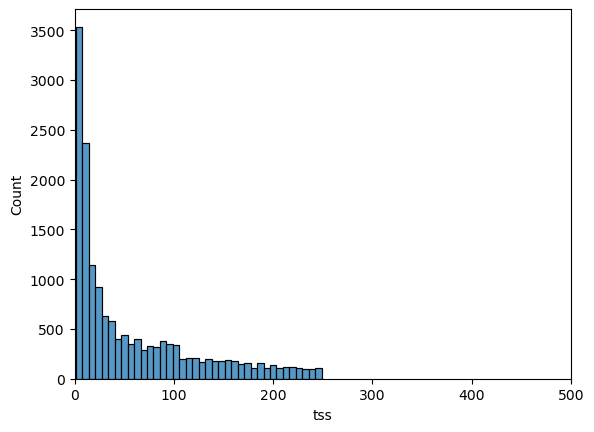

In [134]:
# replace NaN values with the corresponding non-null value from the same column
#df['huc']= df.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling



df_model = df_slim
print(len(df_model.columns))
#print(df_model.columns.values.tolist())
#print(df_model.huc.unique())

#TSS EXPLORE
tssDescribe = 10**(df_model.tss_log)
print(tssDescribe.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=df_model, x=10**(df_model.tss_log))
plt.xlim(0, 500)
plt.xlabel('tss')

In [135]:
naSumDF = df_model.isna().sum()
selected_colsDF = naSumDF[naSumDF > 0]
selected_colsDF

Series([], dtype: int64)

# Model

## RF

In [136]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, KFold, ShuffleSplit
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor

In [137]:
print(df_model.shape[0])
row_mask=df_model.isnull().any(axis=1)
col_mask=df_model.isnull().any(axis=0) 
print(df_model.loc[row_mask,col_mask])
#df_new = df[np.isfinite(df).all(1)]
#print(df_new.shape[0])

16057
Empty DataFrame
Columns: []
Index: []


# AquaFusion: Define a Training and Testing Set



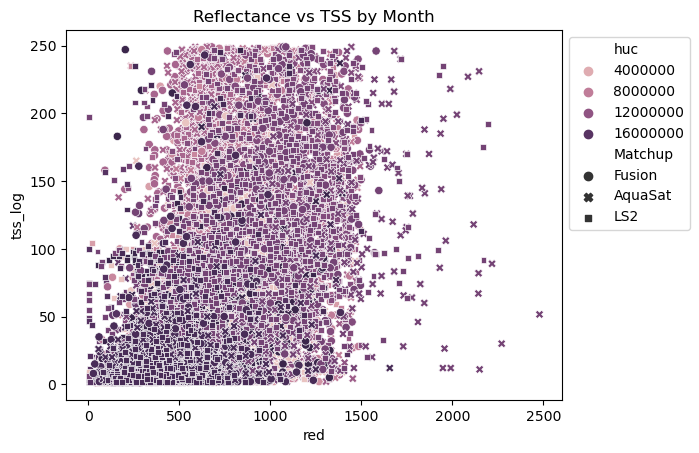

In [138]:
#hlsFusion = hlsFusion[(hlsFusion['tss'] < 200)] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
# features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
#                  'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
#                  'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
#                  'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
#                  'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
#                  'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2', 'GR2_log',
#                  'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'huc', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']
labels = 'tss_log'
df_rf= df_model.reset_index(drop=True).dropna(axis=0)


df_rf = df_rf[np.isfinite(df_rf).all(1)]

# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df_rf[labels])
df_rf = df_rf.drop(labels, axis =1)
#feature_list = list(df_model.columns)
X = np.array(df_rf)



#Plot
plot = sns.scatterplot(data=df, x="red", y=10**(df.tss_log), 
                       legend = 'brief', 
                       style = 'Matchup', hue="huc")
plt.legend(fontsize='10')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.title(label = 'Reflectance vs TSS by Month')
plot

#sns.set(font_scale=1.5)
#g = sns.FacetGrid(df, col="SiteID", hue = 'Matchup')
#g.map_dataframe(sns.scatterplot, x="red", y="tss")
#g.add_legend()

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)


In [16]:
sklearn.metrics.get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [29]:
#Cross Val


# evaluate the model
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#cv = KFold(n_splits=10, shuffle = True, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size = 0.2, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
stdScore = abs(std(n_scores))
meanScore = abs(mean(n_scores))
print('MAPE: %.6f (%.6f)' % (10**(meanScore), 10**(stdScore)))
#print('RMSE: %.6f (%.6f)' % (10**(meanScore), 10**(stdScore)))

#MAPE: 1.757362 (1.050293) #RepeatedKFold
#MAPE: 1.757814 (1.051338) #Kfold
#MAPE: 1.760953 (1.038182) #Shuffle Split

MAPE: 1.760953 (1.038182)


# Random Forest 1: No fit

In [139]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', round(model.oob_score_,2))



(12845, 481)
(3212, 481)
(12845,)
(3212,)
Trained model oob score 0.74


In [140]:
X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])


#Metrics for Model 1 

train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
#Metrics
print('Training score', round(train,2))
print('Testing score', round(test,2))

r2Train = r2_score(y_train, model.predict(X_train))
r2Test = r2_score(y_test, prediction)
print('Training r2', round(r2Train,2))
print('Testing r2', round(r2Test,2))



errorsTrain = (abs(10**(model.predict(X_train)) - 10**(y_train))).mean()
print('Train MAE', round(errorsTrain, 2))

RMSE_modelTrain = np.sqrt(mean_squared_error(10**(y_train), 10**(model.predict(X_train))))
print('Train RMSE', round(RMSE_modelTrain, 2))

RMSE_model = np.sqrt(mean_squared_error(10**(y_test), 10**(prediction)))
print('Test RMSE', round(RMSE_model, 2))

# Calculate the absolute errors
errors = (abs(10**(prediction) - 10**(y_test))).mean()
print('Test MAE', round(errors, 2))

# Calculate mean absolute percentage error (MAPE)
mapeTrain = 100 * (errorsTrain / 10**(y_train))
# Calculate and display accuracy
#accuracyTrain = 100 - np.mean(mapeTrain)
#print('Train Accuracy:', round(accuracyTrain, 2), '%')

mape = 100 * (errors / 10**(y_test))
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Test Accuracy:', round(accuracy, 2), '%')
mapeTrain = mean_absolute_percentage_error(10**(y_train), 10**(model.predict(X_train)))
mapeTest = mean_absolute_percentage_error(10**(y_test), 10**(prediction))
print('MAPE Train', round(mapeTrain, 2))
print('MAPE Test', round(mapeTest, 2))


# calculate relative error
relative_error_test = (abs(10**(y_test) - 10**(prediction)) / 10**(y_test)) * 100
relative_error_train = (abs(10**(y_train) - 10**(model.predict(X_train))) / 10**(y_train)) * 100

# calculate mean relative error
mean_relative_error_train = np.mean(relative_error_train)
mean_relative_error_test = np.mean(relative_error_test)

print("Mean Train relative error:", mean_relative_error_train)
print("Mean Test relative error:", mean_relative_error_test)

#from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

#rRMSE = sqrt(mean((y_true - y_pred)**2) / mean(y_true**2))
rRMSE_modelTrain = np.sqrt(np.mean((10**(y_train) - 10**(model.predict(X_train)))**2) / np.mean(10**(y_train)**2))
print('Train rRMSE', round(rRMSE_modelTrain, 2))

rRMSE_model = np.sqrt(np.mean((10**(y_test) - 10**(prediction))**2) / np.mean(10**(y_test)**2))
print('Test rRMSE', round(rRMSE_model, 2))

#NRMSE = sqrt(mean((y_true - y_pred)**2)) / (max(y_true) - min(y_true))
q1Train = pd.Series(10**(model.predict(X_train))).quantile(0.25)
q3Train = pd.Series(10**(model.predict(X_train))).quantile(0.75)
iqrTrain = q3Train - q1Train

nRMSE_modelTrain = np.sqrt(mean_squared_error(10**(y_train), 10**(model.predict(X_train)))) / iqrTrain
print('Train nRMSE', round(nRMSE_modelTrain, 2))

q1Test = pd.Series(10**(prediction)).quantile(0.25)
q3Test = pd.Series(10**(prediction)).quantile(0.75)
iqrTest = q3Test - q1Test

nRMSE_model = np.sqrt(mean_squared_error(10**(y_test), 10**(prediction))) / iqrTest
print('Test nRMSE', round(nRMSE_model, 2))

#MATCHUP DICTIONARY
hucname = 'conus'
matchupDict = {'HUC': 'conus',
               'Number of Sites': df.SiteID.nunique(),
               'Number AquaSat Matchups': len(df[df['Matchup'] == 'AquaSat']) ,
               'Number LS2 Matchups': len(df[df['Matchup'] == 'LS2']) ,
               'Number Fusion Matchups':  len(df[df['Matchup'] == 'Fusion']),
               'Number Fusion Unmatched': 100000,
               'Number WQP Unmatched': 100000000
              }
print(hucname + '_matchups = ')
print(matchupDict)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx_aquaFusion = np.argsort(feature_importance)
topFeats_aquaFusion = df_model.columns[sorted_idx_aquaFusion].values.tolist()
#print(list(topFeats_aquaFusion[-7:]))
#print(topFeats_aquaFusion[:-9:-1])
feats_aquaFusion = topFeats_aquaFusion[:-20:-1]


#AquaFusion
metricDict_aquaFusion = {'HUC': 'conus',
              'Training Score': round(train, 2),
              'Testing Score': round(test, 2),
              'Train MAE': round(errorsTrain, 2),
              'Train Relative Error': round(mean_relative_error_train, 2),
              'Test Relative Error': round(mean_relative_error_test, 2),
              'Train RMSE': round(RMSE_modelTrain, 2),
              'Test RMSE': round(RMSE_model, 2),
              'Test MAE': round(errors, 2),
              'Train rRMSE': round(rRMSE_modelTrain, 2),
              'Test rRMSE': round(rRMSE_model, 2),
              'Train nRMSE': round(nRMSE_modelTrain, 2),
              'Test nRMSE': round(nRMSE_model, 2),
              'Top 20 Features': feats_aquaFusion
             }
print(hucname + '_aquaFusion =')
print(metricDict_aquaFusion)

              # 'Mean K Score': meanScore,
              # 'Std K Score': stdScore,

Training score 0.96
Testing score 0.74
Training r2 0.96
Testing r2 0.74
Train MAE 9.32
Train RMSE 18.06
Test RMSE 38.18
Test MAE 22.47
MAPE Train 0.2
MAPE Test 0.67
Mean Train relative error: 19.814444149366906
Mean Test relative error: 67.1990481764692
Train rRMSE 0.11
Test rRMSE 0.22
Train nRMSE 0.24
Test nRMSE 0.56
conus_matchups = 
{'HUC': 'conus', 'Number of Sites': 390, 'Number AquaSat Matchups': 5881, 'Number LS2 Matchups': 5235, 'Number Fusion Matchups': 4941, 'Number Fusion Unmatched': 100000, 'Number WQP Unmatched': 100000000}
conus_aquaFusion =
{'HUC': 'conus', 'Training Score': 0.96, 'Testing Score': 0.74, 'Train MAE': 9.32, 'Train Relative Error': 19.81, 'Test Relative Error': 67.2, 'Train RMSE': 18.06, 'Test RMSE': 38.18, 'Test MAE': 22.47, 'Train rRMSE': 0.11, 'Test rRMSE': 0.22, 'Train nRMSE': 0.24, 'Test nRMSE': 0.56, 'Top 20 Features': ['GR2_log', 'red', 'huc', 'Suspended Sediment Concentration (SSC)', 'BR', 'BR_G', 'R_BS', 'USGS-06453305', '%', 'Sediment', 'R_GB', 'y

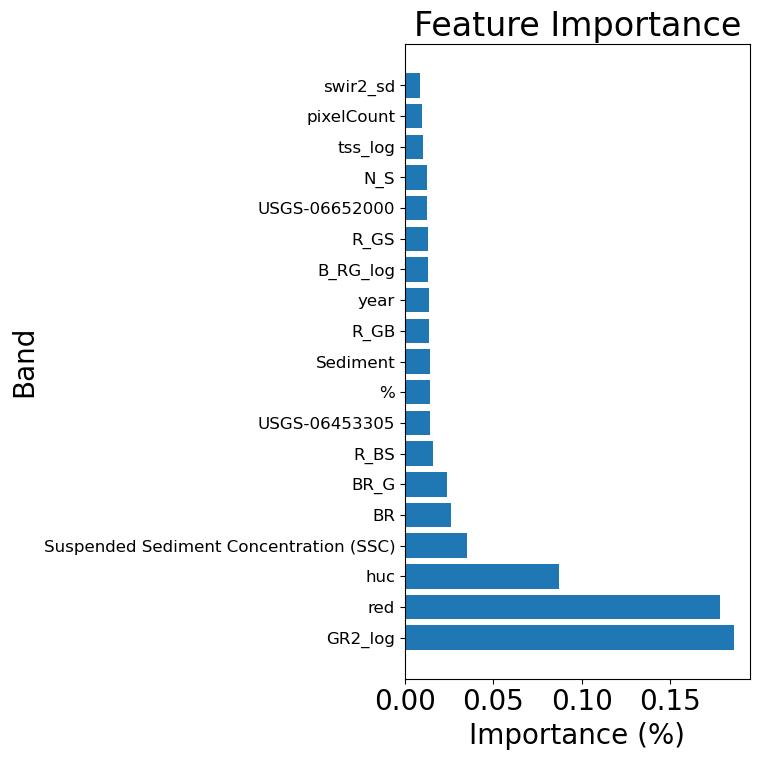

['B_RG', 'swir2_sd', 'pixelCount', 'tss_log', 'N_S', 'USGS-06652000', 'R_GS', 'B_RG_log', 'year', 'R_GB', 'Sediment', '%', 'USGS-06453305', 'R_BS', 'BR_G', 'BR', 'Suspended Sediment Concentration (SSC)', 'huc', 'red', 'GR2_log']
['GR2_log', 'red', 'huc', 'Suspended Sediment Concentration (SSC)', 'BR', 'BR_G', 'R_BS', 'USGS-06453305', '%', 'Sediment', 'R_GB', 'year', 'B_RG_log', 'R_GS', 'USGS-06652000', 'N_S', 'tss_log', 'pixelCount', 'swir2_sd']


In [141]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[:-20:-1]
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df_model.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
fig.tight_layout()
plt.show()


sorted_idx_aquaFusion = np.argsort(feature_importance)
topFeats_aquaFusion = df_slim.columns[sorted_idx_aquaFusion].values.tolist()
print(list(topFeats_aquaFusion[-20:]))
print(topFeats_aquaFusion[:-20:-1])
feats_aquaFusion = topFeats_aquaFusion[:-20:-1]



In [74]:
#Permutation Importance

# result = permutation_importance(model, X_test, y_test, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()

# # Print the feature importances
# for i in sorted_idx[:-20:-1]:
#     print(f"{df_model.columns[i]:<8}"
#           f"{result.importances_mean[i]:.3f}"
#           f" +/- {result.importances_std[i]:.3f}")


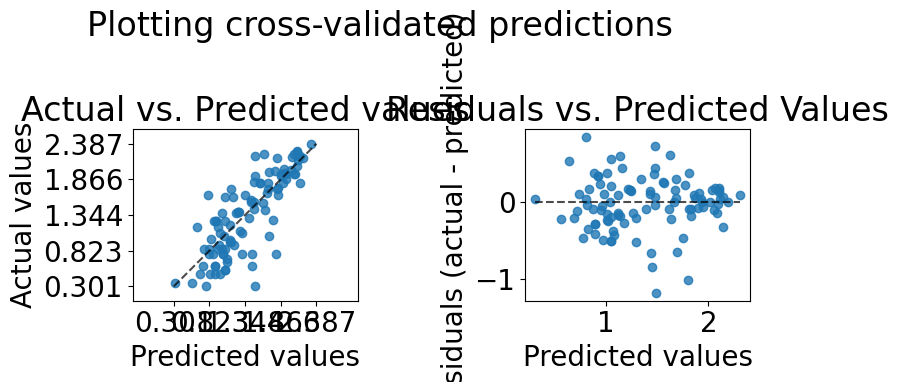

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=prediction,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=prediction,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

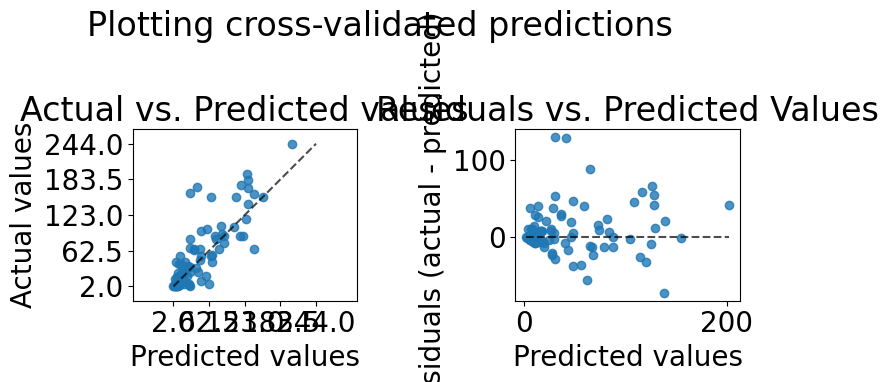

In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    10**(y_test),
    y_pred=10**(prediction),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    10**(y_test),
    y_pred=10**(prediction),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

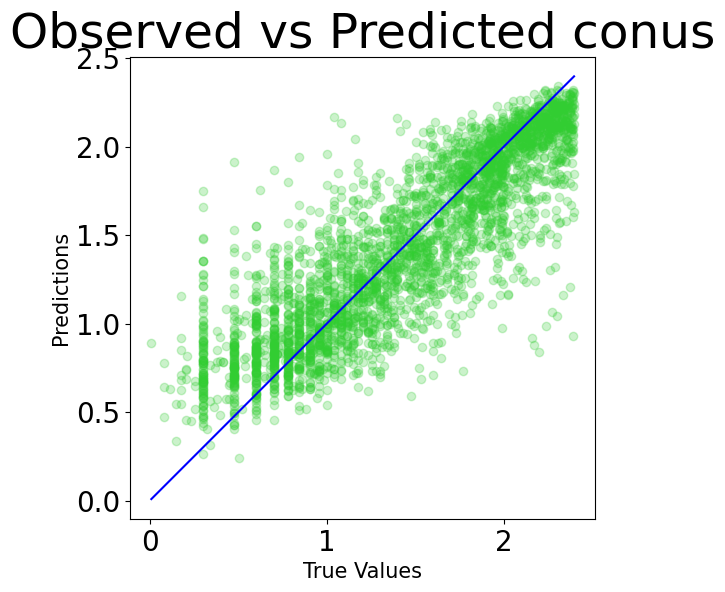

In [144]:
plt.figure(figsize=(6,6))
plt.scatter((y_test), (prediction), c='limegreen', alpha=0.25)
plt.title('Observed vs Predicted' + ' ' + hucname, fontsize = 35)

p1 = max(max((prediction)), max((y_test)))
p2 = min(min((prediction)), min((y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


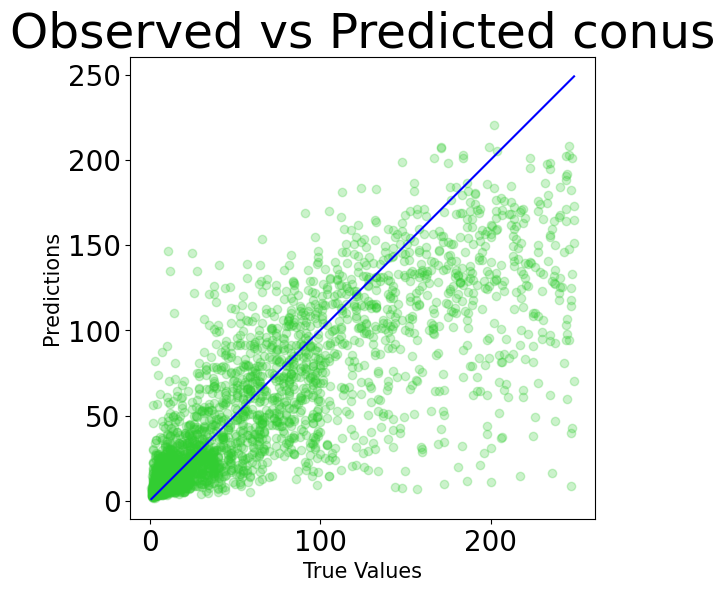

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(10**(y_test), 10**(prediction), c='limegreen', alpha=0.25)
plt.title('Observed vs Predicted' + ' ' + hucname, fontsize = 35)

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()



22.466


Text(0.5, 1.0, 'CONUS Prediction Absolute Errors')

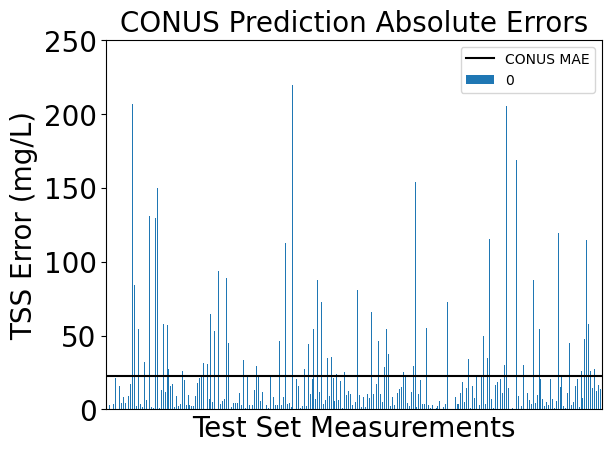

In [146]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errorsabs = abs(10**(prediction) - (10**(y_test)))
mae = float(format(mean(errorsabs), '.3f'))
print(mae)
pd.DataFrame(errorsabs).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = mae, color = 'black', linestyle = '-', 
            label = 'CONUS MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); 
plt.ylabel('TSS Error (mg/L)', fontsize = 20); 
plt.title('CONUS Prediction Absolute Errors', fontsize = 20)

In [232]:

# save the model to a file
joblib.dump(model, '/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaFusion_model.joblib')




['/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaFusion_model.joblib']

# Predict AquaFusion

In [233]:
# load the saved model from a file
loaded_regressor = joblib.load('aquaFusion_model.joblib')

# Call in Fusion Data
file_list = glob.glob(os.path.join('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True).dropna(subset = ['red'])
dataframe = dataframe[(dataframe.red > 0) & (dataframe.pixelCount > 5) & (dataframe.nir > 0) & (dataframe.blue > 0) & (dataframe.green > 0) & 
                      (dataframe.swir1 > 0) & (dataframe.swir2 > 0) & (dataframe.nir > 0)]
fusionPred = dataframe.drop(['dswe', 'source', 'Unnamed: 0', 'Matchup', 'NS_NR', 'sat'], axis=1)



In [234]:
#Merge the huc
allMatchups = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')

# Create a dictionary using the 'name' column as keys and the 'age' column as values
my_dict = dict(zip(allMatchups['SiteID'].values, allMatchups['huc'].values))

print(my_dict)


# use the map function to create a new column based on the dictionary
fusionPred['huc'] = fusionPred['SiteID'].map(my_dict)
#fusionPred = fusionPred.dropna(subset = ['huc'])


# Identify rows with values in the 'name' column that are not in the dictionary keys
mask = ~fusionPred['SiteID'].isin(my_dict)

# Drop the rows that have values in the 'name' column not in the dictionary keys
fusionPred.drop(fusionPred[mask].index, inplace=True)

fusionPred['huc']= fusionPred.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling
fusionPred['huc']= fusionPred.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

print(fusionPred)
#df1 = fusionPred
#merged = df1.merge(df2, on='SiteID', how='left')


#merged = merged.reindex(fusionPred.index)
print(fusionPred.huc.value_counts())


#fusionPred['huc'] = merged['huc']
#print(fusionPred.huc.value_counts())

#Check work
print(fusionPred.loc[fusionPred['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())
print(df.loc[df['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())


{'USGS-03612500': 5140206.0, 'USGS-03049625': 5010009.0, '21PA_WQX-WQN0905': 5030104.0, 'USGS-03216600': 5090103.0, '21PA_WQX-WQN0902': 5030101.0, '21PA_WQX-WQN0701': 5020005.0, 'USGS-03086000': 5030101.0, 'USGS-403909080221401': 5030101.0, '21PA_WQX-WQN0801': 5010009.0, '21VASWCB-9-NEW081.72': 5050001.0, '21VASWCB-9-NEW148.23': 5050001.0, '21VASWCB-9-NEW107.51': 5050001.0, '31ORWUNT_WQX-OR544.8M': 5090201.0, '31ORWUNT_WQX-OR7771M': 5030202.0, '31ORWUNT_WQX-OR7018M': 5090101.0, '31ORWUNT_WQX-OR204.9M': 5140201.0, '31ORWUNT_WQX-OR2603M': 5140201.0, '21VASWCB-9-NEW063.06': 5050001.0, 'USGS-03321500': 5110005.0, '21VASWCB-9-NEW127.49': 5050001.0, 'CEDEN-715CRIDG1': 15030104.0, 'USGS-09429490': 15030104.0, 'USGS-09421500': 15030101.0, 'USGS-09404200': 15010002.0, 'USGS-09427520': 15030104.0, 'USGS-09522000': 15030107.0, 'UTAHDWQ_WQX-4950640': 15010008.0, 'USGS-15292700': 19020503.0, 'USGS-15294350': 19020505.0, 'USGS-15292780': 19020505.0, 'USGS-15298040': 19030205.0, '21AWIC-142': 6030002

In [235]:
#Harmonize columns

#log columns
fusionPred['GR2_log'] = np.log10(fusionPred['GR2'])
fusionPred['R_GB_log'] = np.log10(fusionPred['R_GB'])
fusionPred['B_RG_log'] = np.log10(fusionPred['B_RG'])
fusionPred['red_log'] = np.log10(fusionPred['red'])
fusionPred['green_log'] = np.log10(fusionPred['green'])
fusionPred['blue_log'] = np.log10(fusionPred['blue'])
fusionPred['nir_log'] = np.log10(fusionPred['nir'])
fusionPred['swir1_log'] = np.log10(fusionPred['swir1'])
fusionPred['swir2_log'] = np.log10(fusionPred['swir2'])

#Add the one hot encoded variables manually (since there is only one variable)
fusionPred['Sediment'] = 1
fusionPred['Suspended Sediment Concentration (SSC)'] = 0
fusionPred['Total suspended solids'] = 0
fusionPred['p.sand'] = 0
fusionPred['%'] = 0
fusionPred['mg/l'] = 1
fusionPred['AquaSat'] = 0
fusionPred['Fusion'] = 1
fusionPred['LS2'] = 0
fusionPred['F'] = 1
fusionPred['L5'] = 0
fusionPred['L7'] = 0
fusionPred['L8'] = 0
fusionPred['L9'] = 0
fusionPred['S2'] = 0
print(fusionPred.columns.values.tolist())

#One hot encode SiteID
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_SiteID = pd.get_dummies(fusionPred['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionPred = pd.concat([fusionPred, df_SiteID], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
fusionPred = fusionPred.drop(['SiteID'], axis=1) #, 'SiteID', 'huc'

print(fusionPred.columns.values.tolist())



['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'R_GB_log', 'B_RG_log', 'huc', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log', 'Sediment', 'Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'p.sand', '%', 'mg/l', 'AquaSat', 'Fusion', 'LS2', 'F', 'L5', 'L7', 'L8', 'L9', 'S2']
['date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'S

In [236]:
#Choose the common columns to the model

# keep only columns in fusionPRed that are in df_model
cols_to_keep = fusionPred.columns[fusionPred.columns.isin(df_model.columns)]
fusionPred = fusionPred[cols_to_keep]

print(fusionPred)
# print the result
print(fusionPred.columns.values.tolist())
print(len(fusionPred.columns))

              blue        green          red         nir       swir1  \
1       512.384903   510.540634   513.576355  545.553925  433.609268   
3       407.149429   497.107697   534.942429  497.662613  315.901779   
10      185.096402   274.608905   185.685590  262.332196  151.452415   
12      350.565521   270.734467   280.786926  390.755249  123.501022   
13      287.650360   469.637421   365.500458  524.185913  126.099419   
...            ...          ...          ...         ...         ...   
672286  235.000000   606.000000   761.000000  218.000000  278.000000   
672298  850.800000  1184.000000  1066.740413  557.000000  505.666667   
672305  399.000000  1129.000000  1436.000000  300.000000  546.000000   
672308  233.000000   457.000000   252.000000  244.000000  237.000000   
672312  728.000000   914.000000   661.000000  891.000000  439.000000   

             swir2  pixelCount     blue_sd    green_sd      red_sd  ...  \
1       310.024353        52.0  211.842404  307.416325  282.

In [237]:
#Check for column na's which bonk the RF

naSum = fusionPred.isna().sum()
selected_cols = naSum[naSum > 0]
print(selected_cols)

print(fusionPred.shape[0])
row_mask=fusionPred.isnull().any(axis=1)
col_mask=fusionPred.isnull().any(axis=0) 
print(fusionPred.loc[row_mask,col_mask])

Series([], dtype: int64)
285279
Empty DataFrame
Columns: []
Index: []


In [238]:
#PREDICT as an array

fusionPredArr = fusionPred.values
#use the loaded model to make predictions
predictions = loaded_regressor.predict(fusionPredArr)
print(10**(predictions))

# concatenate the array as a new column to the dataframe
prediction_df = pd.concat([fusionPred[['huc', 'month', 'year', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount']].reset_index(), pd.DataFrame(10**(predictions), columns=['tss'])], axis=1)

#Save predictions
prediction_df.to_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusionPred_aquaFusionModel.csv')

[14.14941909 15.74084119  7.71395147 ... 19.26762719  6.99080462
 16.52115301]


count    285279.000000
mean         16.149764
std           7.668489
min           2.035204
25%          10.093989
50%          15.678110
75%          20.317439
max         225.041957
Name: tss, dtype: float64


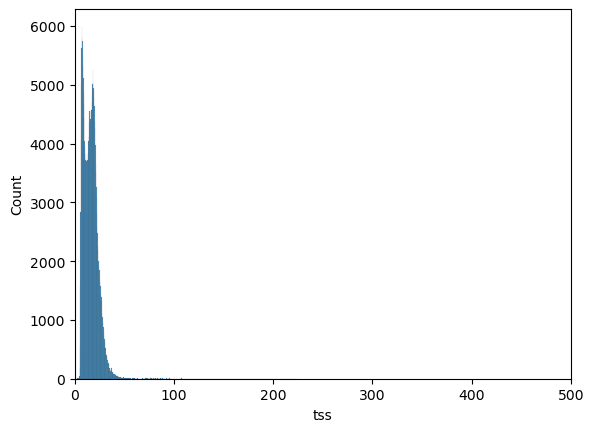

In [239]:
#Predicted TSS EXPLORE

print(prediction_df.tss.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=prediction_df, x="tss")
# set the x-axis limits
plt.xlim(0, 500)
# show the plot
plt.show()

In [29]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [30]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

# Fusion: Define a Training and Testing Set



In [147]:
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat
fusionRF = df[['parameter', 'SiteID', 'huc', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red',
         'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 
         'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 
         'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 
         'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat_cat','year', 'month', 'tss_log', 'B_RG_log',
         'R_GB_log', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']]

fusionRF = fusionRF[(fusionRF['Matchup'] == 'Fusion')]

# One-hot encode the data using pandas get_dummies
df_parameter = pd.get_dummies(fusionRF['parameter'])
df_parameter_name = pd.get_dummies(fusionRF['parameter_name'])
df_units = pd.get_dummies(fusionRF['units'])
df_sat_cat = pd.get_dummies(fusionRF['sat_cat'])
df_huc = pd.get_dummies(fusionRF['huc'])
df_SiteID = pd.get_dummies(fusionRF['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionRF = pd.concat([fusionRF, df_parameter, df_parameter_name, df_units, df_sat_cat, df_SiteID], axis=1)

# drop original 'animal' column
fusionRF = fusionRF.drop(['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat', 'SiteID', 'tss', 'NS_NR'], axis=1)

print(fusionRF.head())

         huc        blue       green         red         nir       swir1  \
0  5140206.0  597.774244  974.000388  933.600922  395.124918   64.324212   
1  5010009.0  385.832998  554.059204  530.092519  286.234039  133.389506   
2  5140206.0  517.906372  852.063365  921.894185  419.148449  126.272635   
3  5140206.0  587.819289  916.347098  878.122109  604.353499  291.578209   
4  5030104.0  284.150970  648.413239  172.271309  414.811447  177.910378   

        swir2  pixelCount     blue_sd    green_sd  ...  WIDNR_WQX-093001  \
0   35.918749       506.0   63.138801  107.149141  ...                 0   
1  146.862450       159.0  107.378150  112.430609  ...                 0   
2   71.581152       488.0   80.948265  107.460120  ...                 0   
3  219.892488       678.0   97.022852  126.038561  ...                 0   
4  122.364838        28.0  122.584155  180.156706  ...                 0   

   WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WIDNR_WQX-223282  \
0      

In [148]:

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'pixelCount']
labels = 'tss_log'
df_modelB= fusionRF.reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df_modelB[labels])
df_modelB = df_modelB.drop(labels, axis =1)
feature_list = list(df_modelB.columns)
X = np.array(df_modelB)


X_trainB, X_testB, y_trainB, y_testB = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainB.shape)
print(X_testB.shape)
print(y_trainB.shape)
print(y_testB.shape)

#define model
modelB = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)


#Plot
# plot = sns.scatterplot(data=fusionRF, x="nir", y="tss_log", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="month")
# plt.legend(fontsize='10')
# plt.title(label = 'Reflectance vs TSS by Month')
# plot

# sns.set(font_scale=1.5)
# g = sns.FacetGrid(fusionRF, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="red", y="tss")
# g.add_legend()


(3705, 428)
(1236, 428)
(3705,)
(1236,)


In [52]:
#Cross Val
#define model
modelB = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelB, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
stdScoreB = std(n_scores)
meanScoreB = mean(n_scores)
print('MAE: %.6f (%.6f)' % (meanScoreB, stdScoreB))


MAE: -0.359386 (0.016330)


# Random Forest 1: No fit

In [150]:
#Quick eval raw
modelB.fit(X_trainB, y_trainB)
print('Trained model oob score', modelB.oob_score_)

X_train_predictB=pd.DataFrame(modelB.predict(X_trainB))
predictionB = modelB.predict(X_testB)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictB=pd.DataFrame(
    modelB.predict(X_testB)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictB=pd.DataFrame(
    modelB.predict(X_trainB)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictB = pd.concat([X_train_predictB, X_test_predictB])

#Metrics for Model 1 

errorsTrainB = (abs(10**(modelB.predict(X_trainB)) - 10**(y_trainB))).mean()
print('Train MAE', round(errorsTrainB, 2))

RMSE_modelB = np.sqrt(mean_squared_error(10**(y_testB), 10**(predictionB)))
trainB = modelB.score(X_trainB, y_trainB)
testB = modelB.score(X_testB, y_testB)

#Metrics
trainB = modelB.score(X_trainB, y_trainB)
testB = modelB.score(X_testB, y_testB)
print('Training score', round(trainB,2))
print('Testing score', round(testB,2))


RMSE_modelTrainB = np.sqrt(mean_squared_error(10**(y_trainB), 10**(modelB.predict(X_trainB))))
print('Train RMSE', round(RMSE_modelTrainB, 2))

print('RMSE', RMSE_modelB)

# Calculate the absolute errors
errorsB = (abs(10**(predictionB) - 10**(y_testB))).mean()
print('Test MAE', (errorsB))

# Calculate mean absolute percentage error (MAPE)
mapeB = 100 * (errorsB / 10**(y_testB))
# Calculate and display accuracy

# Calculate and display accuracy
mapeTrainB = 100 * (errorsTrainB / 10**(y_trainB))
accuracyTrainB = 100 - np.mean(mapeTrainB)
#print('Train Accuracy:', round(accuracyTrainB, 2), '%')

accuracyB = 100 - np.mean(mapeB)
#print('Accuracy:', round(accuracyB, 2), '%')

# calculate relative error
relative_error_testB = (abs(10**(y_testB) - 10**(predictionB)) / 10**(y_testB)) * 100
relative_error_trainB = (abs(10**(y_trainB) - 10**(modelB.predict(X_trainB))) / 10**(y_trainB)) * 100

# calculate mean relative error
mean_relative_error_trainB = np.mean(relative_error_trainB)
mean_relative_error_testB = np.mean(relative_error_testB)

print("Mean Train relative error:", mean_relative_error_trainB)
print("Mean Test relative error:", mean_relative_error_testB)

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

#rRMSE = sqrt(mean((y_true - y_pred)**2) / mean(y_true**2))
rRMSE_modelTrainB = np.sqrt(np.mean((10**(y_trainB) - 10**(modelB.predict(X_trainB)))**2) / np.mean(10**(y_trainB)**2))
print('Train rRMSE', round(rRMSE_modelTrainB, 2))

rRMSE_modelB = np.sqrt(np.mean((10**(y_testB) - 10**(predictionB))**2) / np.mean(10**(y_testB)**2))
print('Test rRMSE', round(rRMSE_modelB, 2))

#NRMSE = sqrt(mean((y_true - y_pred)**2)) / (max(y_true) - min(y_true))
q1TrainB = pd.Series(10**(modelB.predict(X_trainB))).quantile(0.25)
q3TrainB = pd.Series(10**(modelB.predict(X_trainB))).quantile(0.75)
iqrTrainB = q3TrainB - q1TrainB

nRMSE_modelTrainB = np.sqrt(mean_squared_error(10**(y_trainB), 10**(modelB.predict(X_trainB)))) / iqrTrainB
print('Train nRMSE', round(nRMSE_modelTrainB, 2))

q1TestB = pd.Series(10**(predictionB)).quantile(0.25)
q3TestB = pd.Series(10**(predictionB)).quantile(0.75)
iqrTestB = q3TestB - q1TestB

nRMSE_modelB = np.sqrt(mean_squared_error(10**(y_testB), 10**(predictionB))) / iqrTestB
print('Test nRMSE', round(nRMSE_modelB, 2))


feature_importanceB = modelB.feature_importances_
sorted_idx_fusion = np.argsort(feature_importanceB)
topFeats_fusion = df_model.columns[sorted_idx_fusion].values.tolist()
#print(list(topFeats_fusion[-7:]))
#print(topFeats_fusion[:-9:-1])
feats_fusion = topFeats_fusion[:-9:-1]

#Fusion
metricDict_fusion = {'HUC': hucname,              
              'Training Score': round(trainB, 2),
              'Testing Score': round(testB, 2),
              # 'Mean K Score': meanScoreB,
              # 'Std K Score': stdScoreB,
              'Train MAE': round(errorsTrainB, 2),
              'Train Relative Error': round(mean_relative_error_trainB, 2),
              'Test Relative Error': round(mean_relative_error_trainB, 2),
              'Train RMSE': round(RMSE_modelTrainB, 2),
              'Test RMSE': round(RMSE_modelB, 2),
              'Test MAE': round(errorsB, 2),
              'Train rRMSE': round(rRMSE_modelTrainB, 2),
              'Test rRMSE': round(rRMSE_modelB, 2),
              'Train nRMSE': round(nRMSE_modelTrainB, 2),
              'Test nRMSE': round(nRMSE_modelB, 2),
              'Top 7 Features': feats_fusion
             }
print(hucname + '_fusion =')

print(metricDict_fusion)


Trained model oob score 0.6310978115856876
Train MAE 11.26
Training score 0.95
Testing score 0.66
Train RMSE 21.84
RMSE 43.478162777852226
Test MAE 25.79670236011156
Mean Train relative error: 23.870373266561607
Mean Test relative error: 77.231295688623
Train rRMSE 0.13
Test rRMSE 0.25
Train nRMSE 0.31
Test nRMSE 0.66
conus_fusion =
{'HUC': 'conus', 'Training Score': 0.95, 'Testing Score': 0.66, 'Train MAE': 11.26, 'Train Relative Error': 23.87, 'Test Relative Error': 23.87, 'Train RMSE': 21.84, 'Test RMSE': 43.48, 'Test MAE': 25.8, 'Train rRMSE': 0.13, 'Test rRMSE': 0.25, 'Train nRMSE': 0.31, 'Test nRMSE': 0.66, 'Top 7 Features': ['GR2_log', 'red', 'huc', 'Sediment', 'SDDENR_WQX-460671', 'R_GB_log', 'SANDIAWQ_WQX-RG010', 'year']}


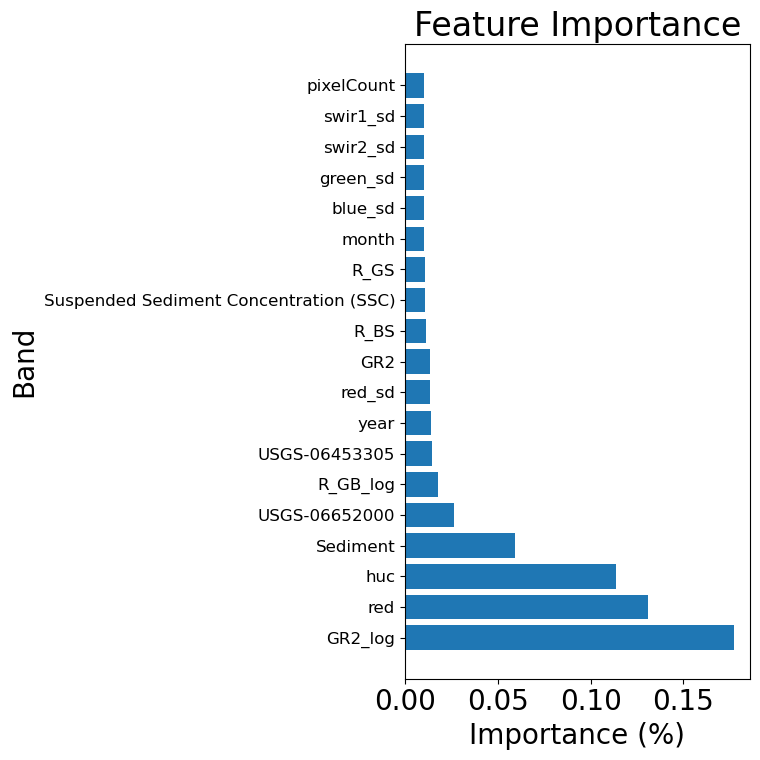

['USGS-06486000', 'GR2_log', 'USGS-06807000', 'Suspended Sediment Concentration (SSC)', 'huc', 'red', 'red_log']
['red_log', 'red', 'huc', 'Suspended Sediment Concentration (SSC)', 'USGS-06807000', 'GR2_log', 'USGS-06486000', 'year']


In [151]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importanceB = modelB.feature_importances_
sorted_idxB = np.argsort(feature_importanceB)[:-20:-1]
posB = np.arange(sorted_idxB.shape[0]) + .5
figB = plt.figure(figsize=(8, 8))
plt.barh(posB, feature_importanceB[sorted_idxB], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(posB, np.array(fusionRF.columns)[sorted_idxB], size = 12)
plt.title('Feature Importance')
figB.tight_layout()
plt.show()

sorted_idx_fusion = np.argsort(feature_importanceB)
topFeats_fusion = df_modelB.columns[sorted_idx_fusion].values.tolist()
print(list(topFeats_fusion[-7:]))
print(topFeats_fusion[:-9:-1])
feats_fusion = topFeats_fusion[:-9:-1]


In [40]:
# resultB = permutation_importance(modelB, X_testB, y_testB, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idxB1 = resultB.importances_mean.argsort()

# # Print the feature importances
# for i in sorted_idxB1[:-20:-1]:
#     print(f"{fusionRF.columns[i]:<8}"
#           f"{result.importances_mean[i]:.3f}"
#           f" +/- {result.importances_std[i]:.3f}")


huc     0.201 +/- 0.006
Sediment0.028 +/- 0.003
USGS-066520000.000 +/- 0.000
red     0.036 +/- 0.003
GR2_log 0.025 +/- 0.003
year    0.009 +/- 0.001
USGS-06453305-0.000 +/- 0.000
Suspended Sediment Concentration (SSC)0.073 +/- 0.004
month   0.004 +/- 0.001
USGS-064860000.000 +/- 0.000
R_GS    0.006 +/- 0.000
red_sd  0.004 +/- 0.001
swir2_sd0.003 +/- 0.001
USGS-091442500.000 +/- 0.000
swir1_sd0.001 +/- 0.000
GR      0.013 +/- 0.001
pixelCount0.002 +/- 0.000
MNPCA-S004-3840.000 +/- 0.000
green_sd0.001 +/- 0.000


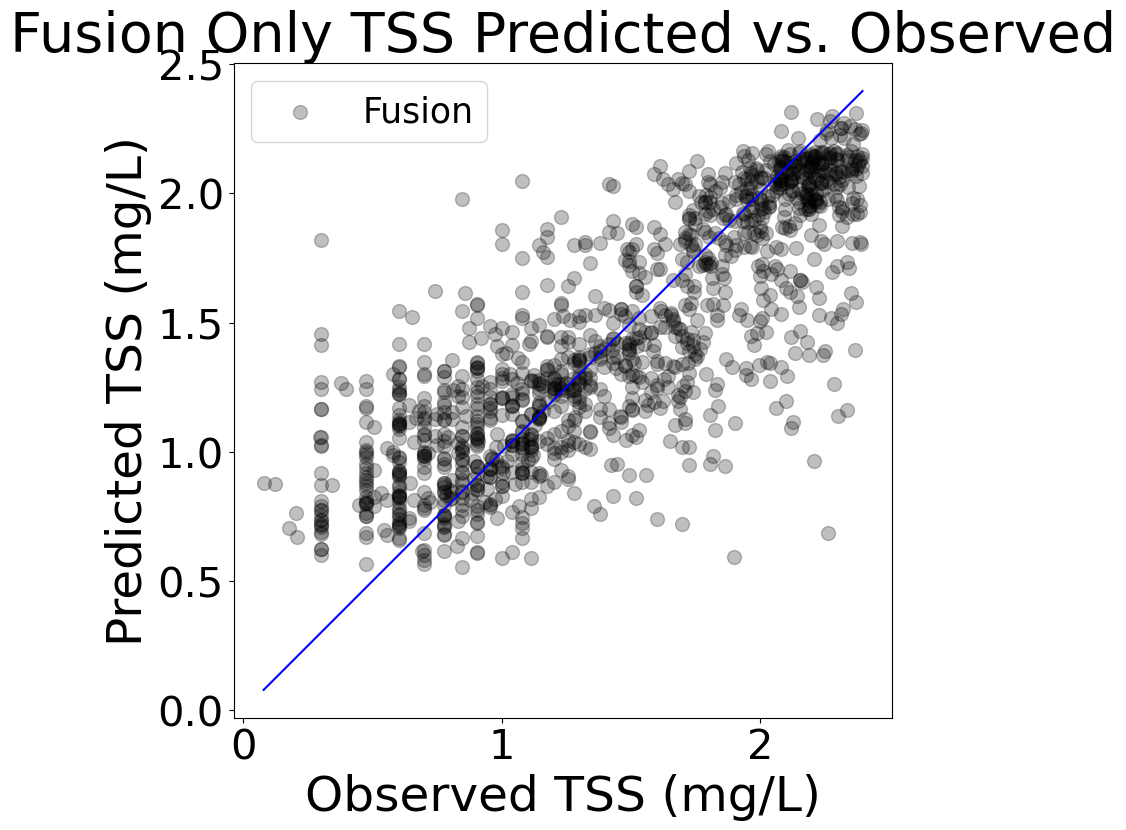

In [152]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testB), (predictionB), c='black', label = 'Fusion', alpha = 0.25, s =100)

p1 = max(max(predictionB), max(y_testB))
p2 = min(min(predictionB), min(y_testB))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Fusion Only TSS Predicted vs. Observed', fontsize = 40)
plt.show()


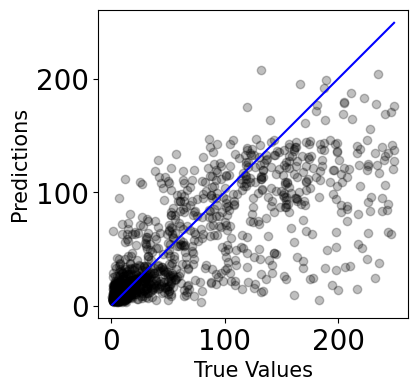

In [153]:
plt.figure(figsize=(4,4))
plt.scatter(10**(y_testB), 10**(predictionB), c='black', alpha = 0.25)

p1 = max(max(10**(predictionB)), max(10**(y_testB)))
p2 = min(min(10**(predictionB)), min(10**(y_testB)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()



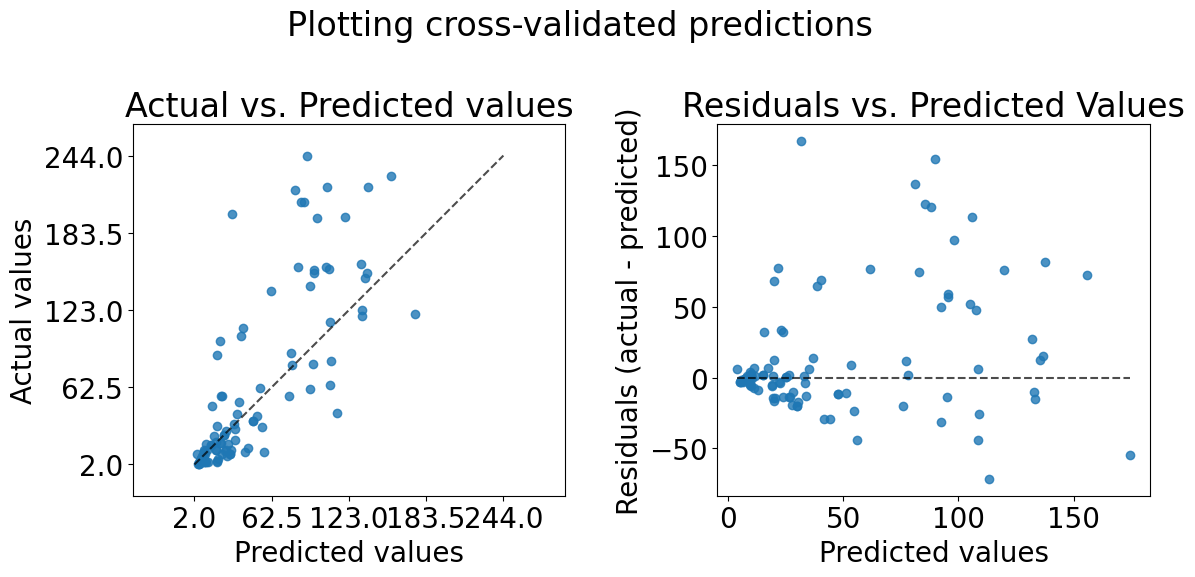

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
PredictionErrorDisplay.from_predictions(
    10**(y_testB),
    y_pred=10**(predictionB),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    10**(y_testB),
    y_pred=10**(predictionB),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

25.797


Text(0.5, 1.0, 'Fusion Prediction Absolute Errors')

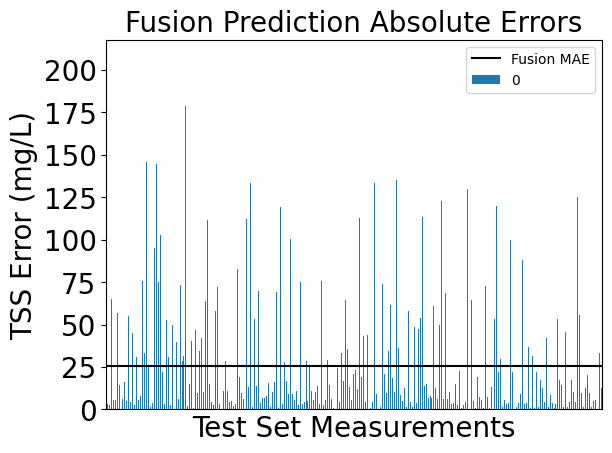

In [155]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errorsBabs = abs(10**(predictionB) - (10**(y_testB)))
maeB = float(format(mean(errorsBabs), '.3f'))
print(maeB)
pd.DataFrame(errorsBabs).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = maeB, color = 'black', linestyle = '-', 
            label = 'Fusion MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); 
plt.ylabel('TSS Error (mg/L)', fontsize = 20); 
plt.title('Fusion Prediction Absolute Errors', fontsize = 20)

In [156]:

# save the model to a file
joblib.dump(modelB, '/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusion_model.joblib')



['/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusion_model.joblib']

# Predict Fusion

In [157]:
# load the saved model from a file
loaded_regressor = joblib.load('fusion_model.joblib')

# Call in Fusion Data
file_list = glob.glob(os.path.join('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True).dropna(subset = ['red'])
dataframe = dataframe[(dataframe.red > 0) & (dataframe.pixelCount > 5) & (dataframe.nir > 0) & (dataframe.blue > 0) & (dataframe.green > 0) & 
                      (dataframe.swir1 > 0) & (dataframe.swir2 > 0) & (dataframe.nir > 0)]
fusionPredB = dataframe.drop(['dswe', 'source', 'Unnamed: 0', 'Matchup', 'NS_NR', 'sat'], axis=1)



In [158]:
#Merge the huc
allMatchups = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')

# Create a dictionary using the 'name' column as keys and the 'age' column as values
my_dict = dict(zip(allMatchups['SiteID'].values, allMatchups['huc'].values))

print(my_dict)


# use the map function to create a new column based on the dictionary
fusionPredB['huc'] = fusionPredB['SiteID'].map(my_dict)
#fusionPred = fusionPred.dropna(subset = ['huc'])


# Identify rows with values in the 'name' column that are not in the dictionary keys
mask = ~fusionPredB['SiteID'].isin(my_dict)

# Drop the rows that have values in the 'name' column not in the dictionary keys
fusionPredB.drop(fusionPredB[mask].index, inplace=True)

fusionPredB['huc']= fusionPredB.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling
fusionPredB['huc']= fusionPredB.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

print(fusionPredB)
#df1 = fusionPred
#merged = df1.merge(df2, on='SiteID', how='left')


#merged = merged.reindex(fusionPred.index)
print(fusionPredB.huc.value_counts())


#fusionPred['huc'] = merged['huc']
#print(fusionPred.huc.value_counts())

#Check work
print(fusionPredB.loc[fusionPredB['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())
print(df.loc[df['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())


{'USGS-03612500': 5140206.0, 'USGS-03049625': 5010009.0, '21PA_WQX-WQN0905': 5030104.0, 'USGS-03216600': 5090103.0, '21PA_WQX-WQN0902': 5030101.0, '21PA_WQX-WQN0701': 5020005.0, 'USGS-03086000': 5030101.0, 'USGS-403909080221401': 5030101.0, '21PA_WQX-WQN0801': 5010009.0, '21VASWCB-9-NEW081.72': 5050001.0, '21VASWCB-9-NEW148.23': 5050001.0, '21VASWCB-9-NEW107.51': 5050001.0, '31ORWUNT_WQX-OR544.8M': 5090201.0, '31ORWUNT_WQX-OR7771M': 5030202.0, '31ORWUNT_WQX-OR7018M': 5090101.0, '31ORWUNT_WQX-OR204.9M': 5140201.0, '31ORWUNT_WQX-OR2603M': 5140201.0, '21VASWCB-9-NEW063.06': 5050001.0, 'USGS-03321500': 5110005.0, '21VASWCB-9-NEW127.49': 5050001.0, 'CEDEN-715CRIDG1': 15030104.0, 'USGS-09429490': 15030104.0, 'USGS-09421500': 15030101.0, 'USGS-09404200': 15010002.0, 'USGS-09427520': 15030104.0, 'USGS-09522000': 15030107.0, 'UTAHDWQ_WQX-4950640': 15010008.0, 'USGS-15292700': 19020503.0, 'USGS-15294350': 19020505.0, 'USGS-15292780': 19020505.0, 'USGS-15298040': 19030205.0, '21AWIC-142': 6030002

In [159]:
#Harmonize columns

#log columns
fusionPredB['GR2_log'] = np.log10(fusionPredB['GR2'])
fusionPredB['R_GB_log'] = np.log10(fusionPredB['R_GB'])
fusionPredB['B_RG_log'] = np.log10(fusionPredB['B_RG'])
fusionPredB['red_log'] = np.log10(fusionPredB['red'])
fusionPredB['green_log'] = np.log10(fusionPredB['green'])
fusionPredB['blue_log'] = np.log10(fusionPredB['blue'])
fusionPredB['nir_log'] = np.log10(fusionPredB['nir'])
fusionPredB['swir1_log'] = np.log10(fusionPredB['swir1'])
fusionPredB['swir2_log'] = np.log10(fusionPredB['swir2'])

#Add the one hot encoded variables manually (since there is only one variable)
fusionPredB['Sediment'] = 1
fusionPredB['Suspended Sediment Concentration (SSC)'] = 0
fusionPredB['Total suspended solids'] = 0
fusionPredB['p.sand'] = 0
fusionPredB['%'] = 0
fusionPredB['mg/l'] = 1
#fusionPred['AquaSat'] = 0
#fusionPred['Fusion'] = 1
#fusionPred['LS2'] = 0
fusionPredB['F'] = 1
fusionPredB['L5'] = 0
fusionPredB['L7'] = 0
fusionPredB['L8'] = 0
fusionPredB['L9'] = 0
fusionPredB['S2'] = 0
print(fusionPredB.columns.values.tolist())

#One hot encode SiteID
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_SiteID = pd.get_dummies(fusionPredB['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionPredB = pd.concat([fusionPredB, df_SiteID], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
fusionPredB = fusionPredB.drop(['SiteID'], axis=1) #, 'SiteID', 'huc'

print(fusionPredB.columns.values.tolist())



['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'R_GB_log', 'B_RG_log', 'huc', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log', 'Sediment', 'Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'p.sand', '%', 'mg/l', 'F', 'L5', 'L7', 'L8', 'L9', 'S2']
['date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 

In [160]:
#Choose the common columns to the model

# keep only columns in fusionPRed that are in df_model
cols_to_keep = fusionPredB.columns[fusionPredB.columns.isin(df_modelB.columns)]
fusionPredB = fusionPredB[cols_to_keep]

# Find the different columns between the two dataframes
diff_cols = set(df_modelB.columns) - set(fusionPredB.columns)

print(diff_cols) # Output: {'A'} hopefully its empty
print(fusionPredB.head())
# print the result
#print(fusionPredB.columns.values.tolist())
#print(df_modelB.columns.values.tolist())
#print(len(fusionPredB.columns))

set()
          blue       green         red         nir       swir1       swir2  \
1   512.384903  510.540634  513.576355  545.553925  433.609268  310.024353   
3   407.149429  497.107697  534.942429  497.662613  315.901779  398.569550   
10  185.096402  274.608905  185.685590  262.332196  151.452415  116.255924   
12  350.565521  270.734467  280.786926  390.755249  123.501022  122.298218   
13  287.650360  469.637421  365.500458  524.185913  126.099419   95.334610   

    pixelCount     blue_sd    green_sd      red_sd  ...  WIDNR_WQX-093001  \
1         52.0  211.842404  307.416325  282.524778  ...                 0   
3         40.0  330.371368  349.557302  337.497689  ...                 0   
10       155.0   89.360562  118.407291  153.589152  ...                 0   
12        25.0  295.532587  359.022765  353.007235  ...                 0   
13        34.0  315.719776  297.532329  339.196698  ...                 0   

    WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WI

In [161]:
#Check for column na's which bonk the RF

naSum = fusionPredB.isna().sum()
selected_cols = naSum[naSum > 0]
print(selected_cols)

print(fusionPredB.shape[0])
row_mask=fusionPredB.isnull().any(axis=1)
col_mask=fusionPredB.isnull().any(axis=0) 
print(fusionPredB.loc[row_mask,col_mask])

Series([], dtype: int64)
285279
Empty DataFrame
Columns: []
Index: []


In [162]:
#PREDICT as an array

fusionPredArr = fusionPredB.values
#use the loaded model to make predictions
predictions = loaded_regressor.predict(fusionPredArr)
print(10**(predictions))

# concatenate the array as a new column to the dataframe
prediction_df = pd.concat([fusionPred[['huc', 'month', 'year', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount']].reset_index(), pd.DataFrame(10**(predictions), columns=['tss'])], axis=1)

#Save predictions
prediction_df.to_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusionPred_fusionModel.csv')

[ 9.07345867  8.82384058  8.03479774 ... 23.72464738  9.88527541
 17.47336309]


count    285279.000000
mean         16.280192
std          10.776167
min           4.746717
25%           9.653564
50%          13.642703
75%          20.860872
max         326.776759
Name: tss, dtype: float64


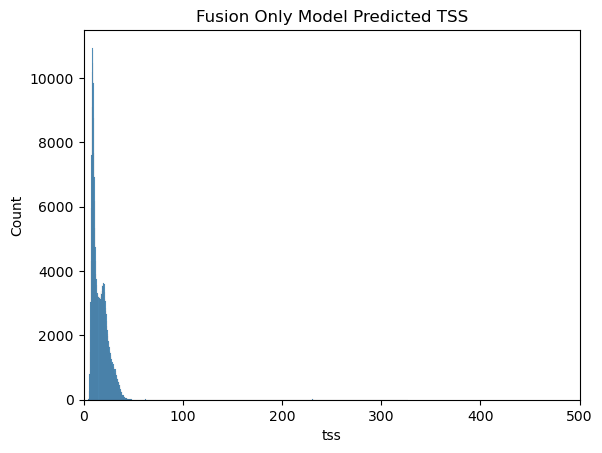

In [165]:
#Predicted TSS EXPLORE

print(prediction_df.tss.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=prediction_df, x="tss")
# set the x-axis limits
plt.xlim(0, 500)
plt.title('Fusion Only Model Predicted TSS')
# show the plot
plt.show()

In [ ]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

# Aquasat Performance Using Fusion Sites Only

# Define a Training and Testing Set



In [156]:
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat
aquaRF = df[['parameter', 'SiteID', 'huc', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red', 
         'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 
         'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 
         'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 
         'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat_cat','year', 'month', 'tss_log', 'B_RG_log',
         'R_GB_log', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']]

aquaRF = aquaRF[(aquaRF['Matchup'] == 'AquaSat')]

# One-hot encode the data using pandas get_dummies
df_parameter = pd.get_dummies(aquaRF['parameter'])
df_parameter_name = pd.get_dummies(aquaRF['parameter_name'])
df_units = pd.get_dummies(aquaRF['units'])
df_sat_cat = pd.get_dummies(aquaRF['sat_cat'])
df_huc = pd.get_dummies(aquaRF['huc'])
df_SiteID = pd.get_dummies(aquaRF['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
aquaRF = pd.concat([aquaRF, df_parameter, df_parameter_name, df_units, df_sat_cat, df_SiteID], axis=1)

# drop original 'animal' column
aquaRF = aquaRF.drop(['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat', 'SiteID', 'tss', 'NS_NR'], axis=1)

print(aquaRF.head())

           huc   blue  green    red    nir  swir1  swir2  pixelCount  \
393  5020005.0  535.0  602.0  493.0  523.0  265.0  201.0        50.0   
394  5020005.0  436.0  636.0  543.0  410.0  100.0   51.0        68.0   
395  5020005.0  298.0  388.0  297.0  323.0  110.0   71.0        68.0   
396  5020005.0  448.0  591.0  469.0  434.0  233.0  202.0        68.0   
397  5020005.0  459.0  552.0  487.0  519.0  286.0  242.0        49.0   

       blue_sd   green_sd  ...  UTAHDWQ_WQX-4958520  WIDNR_WQX-093001  \
393  29.380511  31.023191  ...                    0                 0   
394  24.225494  34.454122  ...                    0                 0   
395  32.141031  36.682623  ...                    0                 0   
396  75.567740  77.112218  ...                    0                 0   
397  29.557968  30.040484  ...                    0                 0   

     WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WIDNR_WQX-223282  \
393                   0                 0      

In [157]:
#define a training and testing set
#aquaRF = df_model[(df_model['Matchup'] == 'AquaSat')] #& (hlsFusion['tss'] > 10)] 

labels = 'tss_log'
df_modelA = aquaRF.reset_index(drop=True).dropna(axis=0) #[['year', 'R_GB',
                 #'month', 'R_GB_log', 'tss_log']].reset_index(drop=True) 

df_modelA = df_modelA[np.isfinite(df_modelA).all(1)]

# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df_modelA[labels])
df_modelA = df_modelA.drop(labels, axis =1)
feature_list = list(df_modelA.columns)
X = np.array(df_modelA)

#define model
modelA = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainA.shape)
print(X_testA.shape)
print(y_trainA.shape)
print(y_testA.shape)

#Plot
# plot = sns.scatterplot(data=aquaRF, x="nir", y="tss_log", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="month")
# plt.legend(fontsize='10')
# plt.title(label = 'Reflectance vs TSS by Month')
# plot


# sns.set(font_scale=1)
# g = sns.FacetGrid(aquahuc_model, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
# g.add_legend()


(4410, 335)
(1471, 335)
(4410,)
(1471,)


In [49]:
#Kfold cross validation
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelA, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
stdScoreA = std(n_scores)
meanScoreA = mean(n_scores)
print('MAE: %.6f (%.6f)' % (meanScoreA, stdScoreA))



MAE: -0.291243 (0.011636)


# Random Forest Aquasat

Target: TSS

Input Data: 6 Bands

In [158]:
#Quick eval raw
modelA.fit(X_trainA, y_trainA)
print('Trained model oob score', modelA.oob_score_)

X_train_predictA=pd.DataFrame(modelA.predict(X_trainA))
predictionA = modelA.predict(X_testA)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictA=pd.DataFrame(
    modelA.predict(X_testA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictA=pd.DataFrame(
    modelA.predict(X_trainA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictA = pd.concat([X_train_predictA, X_test_predictA])

#Metrics for Model 1 

RMSE_modelA = np.sqrt(mean_squared_error(10**(y_testA), 10**(predictionA)))
trainA = modelA.score(X_trainA, y_trainA)
testA = modelA.score(X_testA, y_testA)
#Metrics
trainA = modelA.score(X_trainA, y_trainA)
testA = modelA.score(X_testA, y_testA)
print('Training score', round(trainA,2))
print('Testing score', round(testA,2))

print('RMSE', RMSE_modelA)

errorsTrainA = (abs(10**(modelA.predict(X_trainA)) - 10**(y_trainA))).mean()
print('Train MAE', round(errorsTrainA, 2))

RMSE_modelTrainA = np.sqrt(mean_squared_error(10**(y_trainA), 10**(modelA.predict(X_trainA))))
print('Train RMSE', round(RMSE_modelTrainA, 2))

RMSE_modelA = np.sqrt(mean_squared_error(10**(y_testA), 10**(predictionA)))
print('Test RMSE', round(RMSE_modelA, 2))

# Calculate the absolute errors
errorsA = (abs(10**(predictionA) - 10**(y_testA))).mean()
print('Test MAE', round(errorsA, 2))

# Calculate mean absolute percentage error (MAPE)
mapeTrainA = 100 * (errorsTrainA / 10**(y_trainA))
# Calculate and display accuracy
accuracyTrainA = 100 - np.mean(mapeTrainA)
#print('Train Accuracy:', round(accuracyTrainA, 2), '%')

mapeA = 100 * (errorsA / 10**(y_testA))
# Calculate and display accuracy
accuracyA = 100 - np.mean(mapeA)
#print('Test Accuracy:', round(accuracyA, 2), '%')

# calculate relative error
relative_error_testA = (abs(10**(y_testA) - 10**(predictionA)) / 10**(y_testA)) * 100
relative_error_trainA = (abs(10**(y_trainA) - 10**(modelA.predict(X_trainA))) / 10**(y_trainA)) * 100

# calculate mean relative error
mean_relative_error_trainA = np.mean(relative_error_trainA)
mean_relative_error_testA = np.mean(relative_error_testA)

print("Mean Train relative error:", mean_relative_error_trainA)
print("Mean Test relative error:", mean_relative_error_testA)


from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

#rRMSE = sqrt(mean((y_true - y_pred)**2) / mean(y_true**2))
rRMSE_modelTrainA = np.sqrt(np.mean((10**(y_trainA) - 10**(modelA.predict(X_trainA)))**2) / np.mean(10**(y_trainA)**2))
print('Train rRMSE', round(rRMSE_modelTrainA, 2))

rRMSE_modelA = np.sqrt(np.mean((10**(y_testA) - 10**(predictionA))**2) / np.mean(10**(y_testA)**2))
print('Test rRMSE', round(rRMSE_modelA, 2))

#NRMSE = sqrt(mean((y_true - y_pred)**2)) / (max(y_true) - min(y_true))
q1TrainA = pd.Series(10**(modelA.predict(X_trainA))).quantile(0.25)
q3TrainA = pd.Series(10**(modelA.predict(X_trainA))).quantile(0.75)
iqrTrainA = q3TrainA - q1TrainA

nRMSE_modelTrainA = np.sqrt(mean_squared_error(10**(y_trainA), 10**(modelA.predict(X_trainA)))) / iqrTrainA
print('Train nRMSE', round(nRMSE_modelTrainA, 2))

q1TestA = pd.Series(10**(predictionA)).quantile(0.25)
q3TestA = pd.Series(10**(predictionA)).quantile(0.75)
iqrTestA = q3TestA - q1TestA

nRMSE_modelA = np.sqrt(mean_squared_error(10**(y_testA), 10**(predictionA))) / iqrTestA
print('Test nRMSE', round(nRMSE_modelA, 2))

#AquaSat
feature_importanceA = modelA.feature_importances_
sorted_idx_aquaSat = np.argsort(feature_importanceA)
topFeats_aquaSat = df_model.columns[sorted_idx_aquaSat].values.tolist()
print(list(topFeats_aquaSat[-7:]))
print(topFeats_aquaSat[:-9:-1])
feats_aquaSat = topFeats_aquaSat[:-20:-1]




metricDict_aquaSat = {'HUC': hucname,
              'Training Score': round(trainA, 2),
              'Testing Score': round(testA, 2),
              #'Mean K Score': round(meanScoreA, 2),
              #'Std K Score': round(stdScoreA, 2),
              'Train MAE': round(errorsTrainA, 2),
              'Train RMSE': round(RMSE_modelTrainA, 2),
              'Train Relative Error': round(mean_relative_error_trainA, 2),
              'Test RMSE': round(RMSE_modelA, 2),
              'Test MAE': round(errorsA, 2),
              'Train rRMSE': round(rRMSE_modelTrainA, 2),
              'Test rRMSE': round(rRMSE_modelA, 2),
              'Train nRMSE': round(nRMSE_modelTrainA, 2),
              'Test nRMSE': round(nRMSE_modelA, 2),
              'Test Relative Error': round(mean_relative_error_testA, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_aquaSat =')

print(metricDict_aquaSat)



Trained model oob score 0.7782290445749027
Training score 0.97
Testing score 0.79
RMSE 36.78708634167022
Train MAE 8.42
Train RMSE 16.75
Test RMSE 36.79
Test MAE 20.34
Mean Train relative error: 18.35430712563921
Mean Test relative error: 56.105188553868416
Train rRMSE 0.09
Test rRMSE 0.2
Train nRMSE 0.24
Test nRMSE 0.58
['GR', 'BR', 'BR_G', 'huc', 'R_BS', 'GR2_log', 'red']
['red', 'GR2_log', 'R_BS', 'huc', 'BR_G', 'BR', 'GR', 'IDEQ_WQX-BR-11']
conus_aquaSat =
{'HUC': 'conus', 'Training Score': 0.97, 'Testing Score': 0.79, 'Train MAE': 8.42, 'Train RMSE': 16.75, 'Train Relative Error': 18.35, 'Test RMSE': 36.79, 'Test MAE': 20.34, 'Train rRMSE': 0.09, 'Test rRMSE': 0.2, 'Train nRMSE': 0.24, 'Test nRMSE': 0.58, 'Test Relative Error': 56.11, 'Top 7 Features': ['red', 'GR2_log', 'R_BS', 'huc', 'BR_G', 'BR', 'GR', 'IDEQ_WQX-BR-11', 'R_GS', 'MDEQ_WQ_WQX-M09MISSR24', 'pixelCount', 'N_S', 'red_sd', 'year', 'RG', 'nir_sd', 'B_RG_log', 'swir2_sd', 'COEOMAHA_WQX-MORRR0498B']}


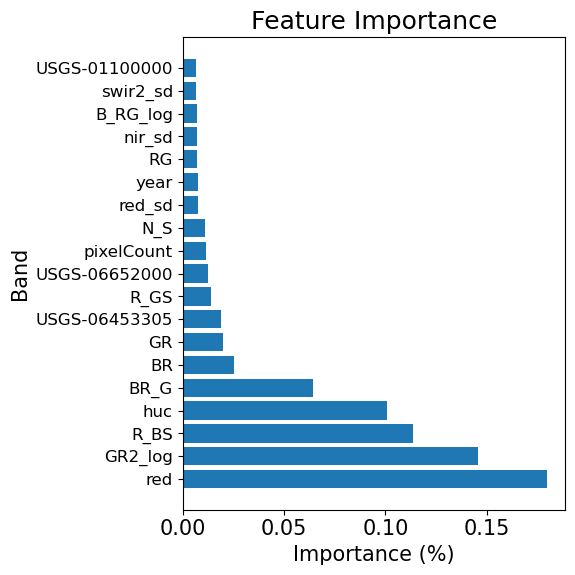

In [159]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 15})
feature_importanceA = modelA.feature_importances_
sorted_idxA = np.argsort(feature_importanceA)[:-20:-1]
pos = np.arange(sorted_idxA.shape[0]) + .5
fig = plt.figure(figsize=(6, 6))
plt.barh(pos, feature_importanceA[sorted_idxA], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(aquaRF.columns)[sorted_idxA], size = 12)
plt.title('Feature Importance')
fig.tight_layout()
plt.show()



In [102]:
# #Permutation Importance
# resultA = permutation_importance(modelA, X_testA, y_testA, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idxA1 = resultA.importances_mean.argsort()

# # Print the feature importances
# for i in sorted_idxA1[:-20:-1]:
#     print(f"{df_model.columns[i]:<8}"
#           f"{result.importances_mean[i]:.3f}"
#           f" +/- {result.importances_std[i]:.3f}")


NameError: name 'result' is not defined

In [ ]:
#y_testA = 10**(y_testA)
#predictionA = 10**(predictionA)
#y_test = 10**(y_test)
#prediction = 10**(prediction)

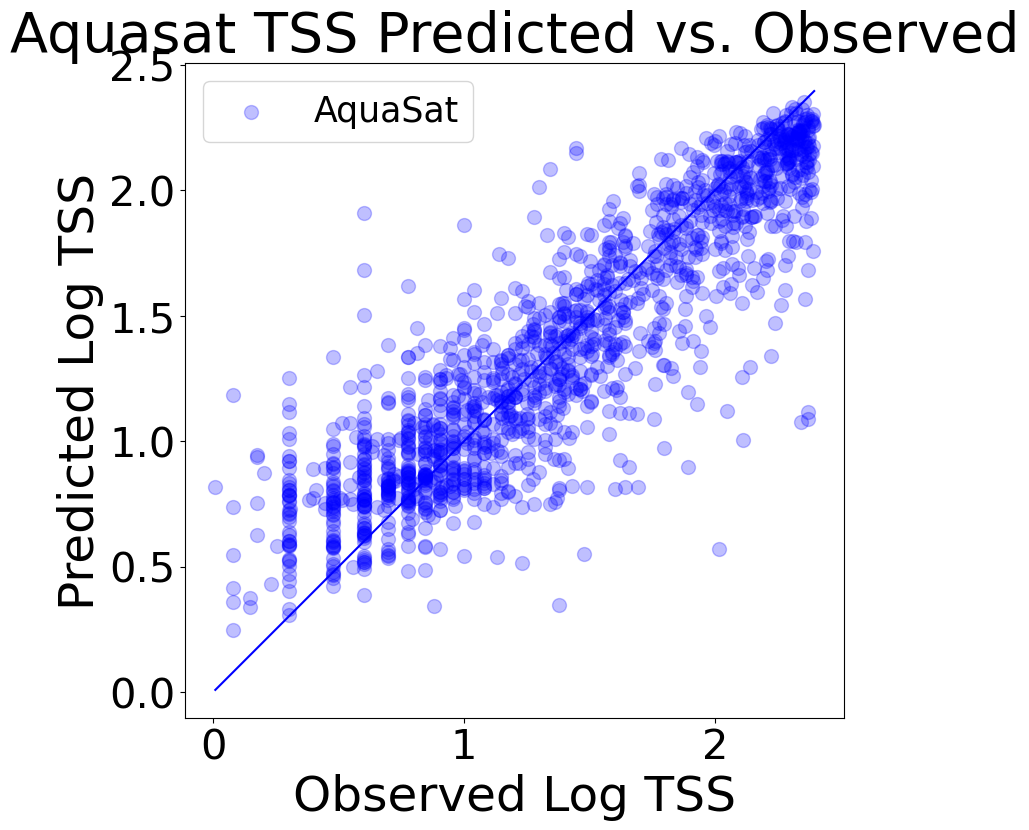

In [160]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='blue', label = 'AquaSat', alpha = 0.25, s = 100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed Log TSS', fontsize=35)
plt.ylabel('Predicted Log TSS', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


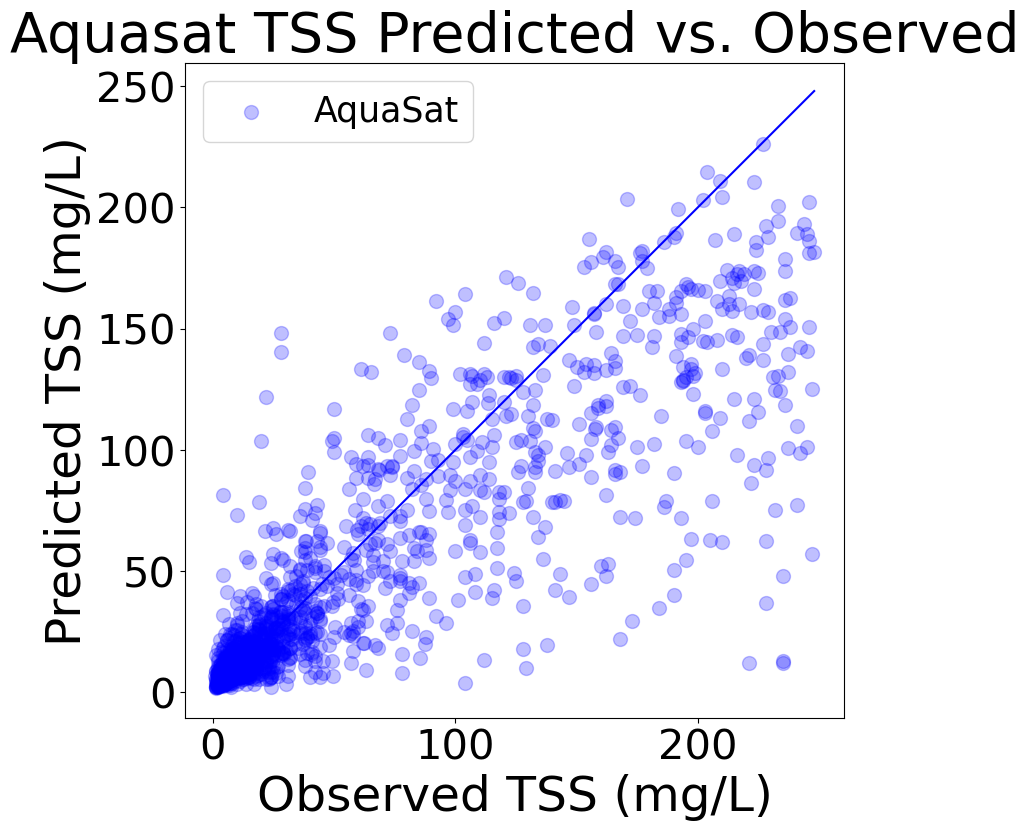

In [161]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter(10**(y_testA), 10**(predictionA), c='blue', label = 'AquaSat', alpha = 0.25, s = 100)

p1 = max(max(10**(predictionA)), max(10**(y_testA)))
p2 = min(min(10**(predictionA)), min(10**(y_testA)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


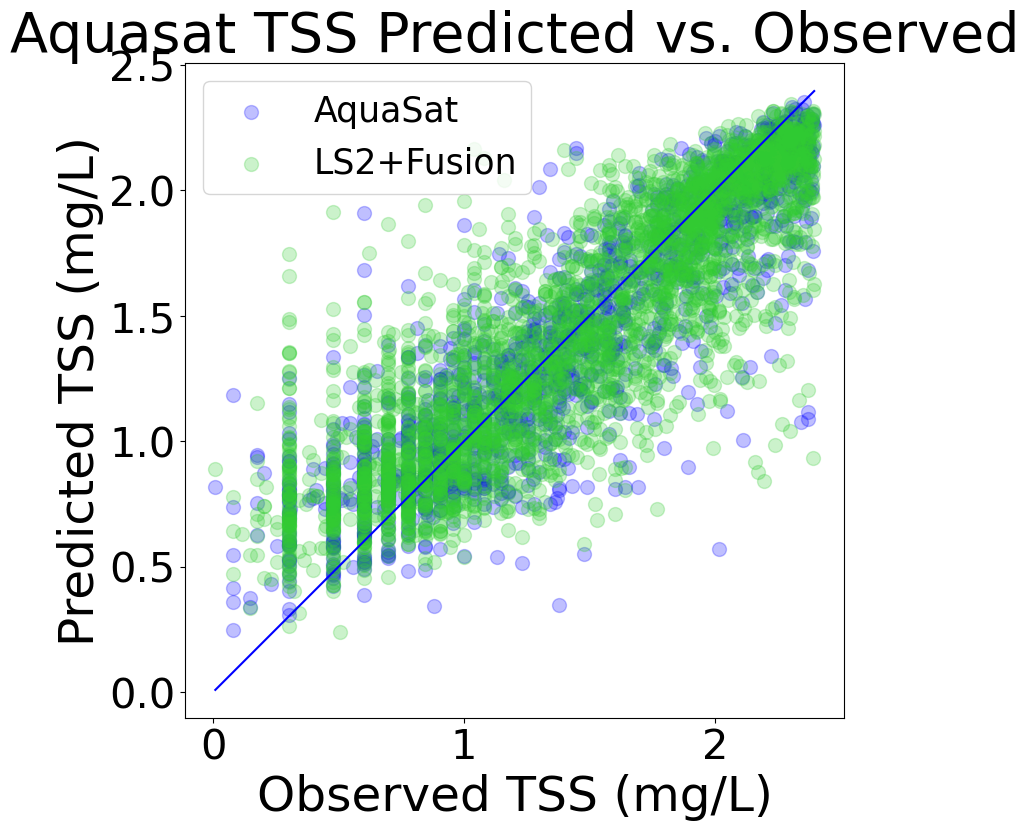

In [162]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='blue', label = 'AquaSat', alpha = 0.25, s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'LS2+Fusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


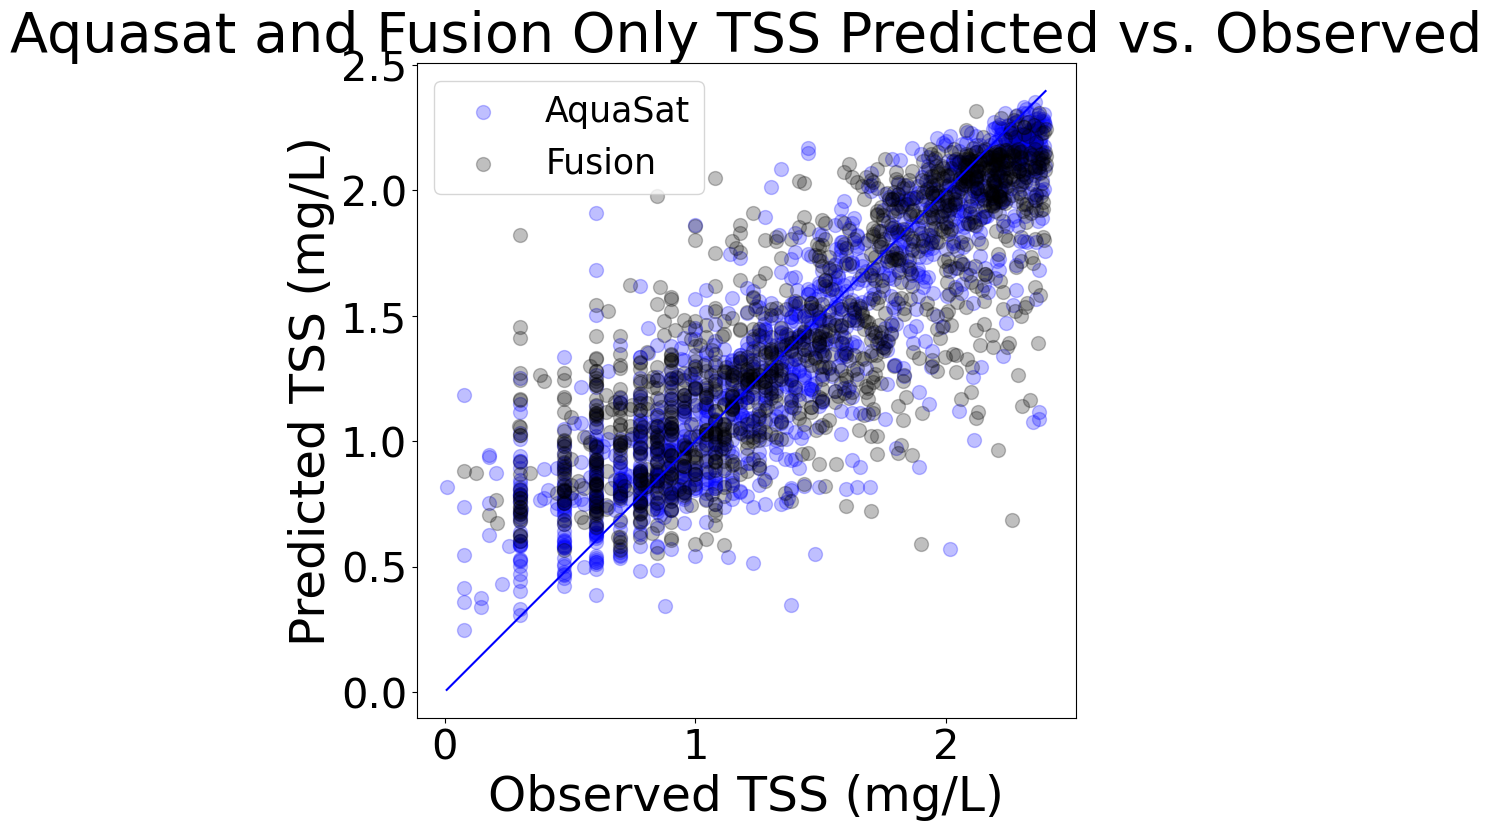

In [163]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='blue', label = 'AquaSat', alpha = 0.25, s = 100)
plt.scatter((y_testB), (predictionB), c='black', label = 'Fusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat and Fusion Only TSS Predicted vs. Observed', fontsize = 40)
plt.show()


20.335


Text(0.5, 1.0, 'Prediction Absolute Errors')

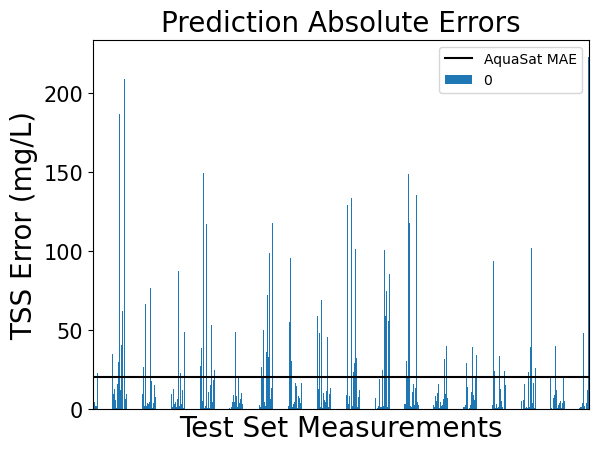

In [164]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errorsAabs = abs(10**(predictionA) - (10**(y_testA)))
maeA = float(format(mean(errorsAabs), '.3f'))
print(maeA)
pd.DataFrame(errorsAabs).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = maeA, color = 'black', linestyle = '-', label = 'AquaSat MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); plt.ylabel('TSS Error (mg/L)', fontsize = 20); plt.title('Prediction Absolute Errors', fontsize = 20)

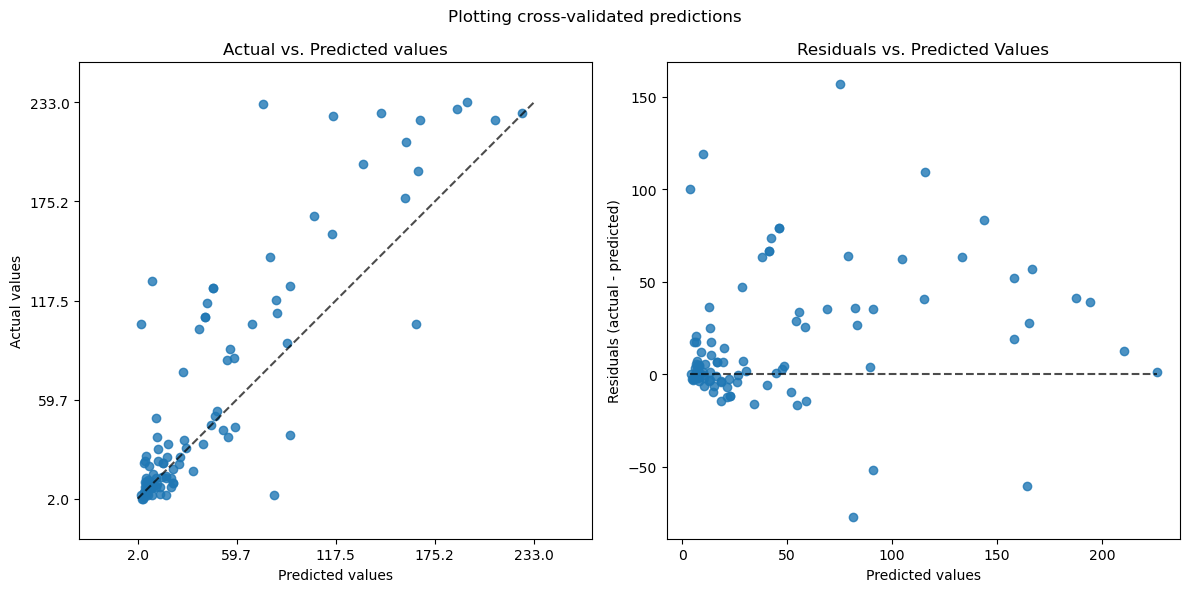

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
PredictionErrorDisplay.from_predictions(
    10**(y_testA),
    y_pred=10**(predictionA),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    10**(y_testA),
    y_pred=10**(predictionA),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [184]:

# save the model to a file
joblib.dump(modelA, '/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaSat_model.joblib')



['/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaSat_model.joblib']

# Predict AquaSat

In [203]:
# load the saved model from a file
loaded_regressor = joblib.load('aquaSat_model.joblib')

# Call in Fusion Data
file_list = glob.glob(os.path.join('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True).dropna(subset = ['red'])
dataframe = dataframe[(dataframe.red > 0) & (dataframe.pixelCount > 5) & (dataframe.nir > 0) & (dataframe.blue > 0) & (dataframe.green > 0) & 
                      (dataframe.swir1 > 0) & (dataframe.swir2 > 0) & (dataframe.nir > 0)]
fusionPredA = dataframe.drop(['dswe', 'source', 'Unnamed: 0', 'Matchup', 'NS_NR', 'sat'], axis=1)



In [204]:
#Merge the huc
allMatchups = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')

# Create a dictionary using the 'name' column as keys and the 'age' column as values
my_dict = dict(zip(allMatchups['SiteID'].values, allMatchups['huc'].values))

print(my_dict)


# use the map function to create a new column based on the dictionary
fusionPredA['huc'] = fusionPredA['SiteID'].map(my_dict)
#fusionPred = fusionPred.dropna(subset = ['huc'])


# Identify rows with values in the 'name' column that are not in the dictionary keys
mask = ~fusionPredA['SiteID'].isin(my_dict)

# Drop the rows that have values in the 'name' column not in the dictionary keys
fusionPredA.drop(fusionPredA[mask].index, inplace=True)

fusionPredA['huc']= fusionPredA.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling
fusionPredA['huc']= fusionPredA.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

print(fusionPredA)
#df1 = fusionPred
#merged = df1.merge(df2, on='SiteID', how='left')


#merged = merged.reindex(fusionPred.index)
print(fusionPredA.huc.value_counts())


#fusionPred['huc'] = merged['huc']
#print(fusionPred.huc.value_counts())

#Check work
print(fusionPredA.loc[fusionPredA['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())
print(allMatchups.loc[allMatchups['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())


{'USGS-03612500': 5140206.0, 'USGS-03049625': 5010009.0, '21PA_WQX-WQN0905': 5030104.0, 'USGS-03216600': 5090103.0, '21PA_WQX-WQN0902': 5030101.0, '21PA_WQX-WQN0701': 5020005.0, 'USGS-03086000': 5030101.0, 'USGS-403909080221401': 5030101.0, '21PA_WQX-WQN0801': 5010009.0, '21VASWCB-9-NEW081.72': 5050001.0, '21VASWCB-9-NEW148.23': 5050001.0, '21VASWCB-9-NEW107.51': 5050001.0, '31ORWUNT_WQX-OR544.8M': 5090201.0, '31ORWUNT_WQX-OR7771M': 5030202.0, '31ORWUNT_WQX-OR7018M': 5090101.0, '31ORWUNT_WQX-OR204.9M': 5140201.0, '31ORWUNT_WQX-OR2603M': 5140201.0, '21VASWCB-9-NEW063.06': 5050001.0, 'USGS-03321500': 5110005.0, '21VASWCB-9-NEW127.49': 5050001.0, 'CEDEN-715CRIDG1': 15030104.0, 'USGS-09429490': 15030104.0, 'USGS-09421500': 15030101.0, 'USGS-09404200': 15010002.0, 'USGS-09427520': 15030104.0, 'USGS-09522000': 15030107.0, 'UTAHDWQ_WQX-4950640': 15010008.0, 'USGS-15292700': 19020503.0, 'USGS-15294350': 19020505.0, 'USGS-15292780': 19020505.0, 'USGS-15298040': 19030205.0, '21AWIC-142': 6030002

In [205]:
#Harmonize columns

#log columns
fusionPredA['GR2_log'] = np.log10(fusionPredA['GR2'])
fusionPredA['R_GB_log'] = np.log10(fusionPredA['R_GB'])
fusionPredA['B_RG_log'] = np.log10(fusionPredA['B_RG'])
fusionPredA['red_log'] = np.log10(fusionPredA['red'])
fusionPredA['green_log'] = np.log10(fusionPredA['green'])
fusionPredA['blue_log'] = np.log10(fusionPredA['blue'])
fusionPredA['nir_log'] = np.log10(fusionPredA['nir'])
fusionPredA['swir1_log'] = np.log10(fusionPredA['swir1'])
fusionPredA['swir2_log'] = np.log10(fusionPredA['swir2'])

#Add the one hot encoded variables manually (since there is only one variable)
fusionPredA['Sediment'] = 1
fusionPredA['Suspended Sediment Concentration (SSC)'] = 0
fusionPredA['Total suspended solids'] = 0
fusionPredA['p.sand'] = 0
fusionPredA['%'] = 0
fusionPredA['mg/l'] = 1
#fusionPredA['AquaSat'] = 0
#fusionPredA['Fusion'] = 1
#fusionPredA['LS2'] = 0
fusionPredA['F'] = 1
fusionPredA['L5'] = 0
fusionPredA['L7'] = 0
fusionPredA['L8'] = 0
fusionPredA['L9'] = 0
fusionPredA['S2'] = 0
print(fusionPredA.columns.values.tolist())

#One hot encode SiteID
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_SiteID = pd.get_dummies(fusionPredA['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionPredA = pd.concat([fusionPredA, df_SiteID], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
fusionPredA = fusionPredA.drop(['SiteID'], axis=1) #, 'SiteID', 'huc'

print(len(fusionPredA.columns.values.tolist()))



['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'R_GB_log', 'B_RG_log', 'huc', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log', 'Sediment', 'Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'p.sand', '%', 'mg/l', 'F', 'L5', 'L7', 'L8', 'L9', 'S2']
483


In [207]:
#Choose the common columns to the model

# keep only columns in fusionPRed that are in df_model
cols_to_keep = fusionPredA.columns[fusionPredA.columns.isin(df_modelA.columns)]
fusionPredA = fusionPredA[cols_to_keep]

# Find the different columns between the two dataframes
diff_colsA = set(df_modelA.columns) - set(fusionPredA.columns)

print(diff_colsA) # Output: {'A'} hopefully its empty

print(fusionPredA.head())
# print the result
print(fusionPredA.columns.values.tolist())
print(len(fusionPredA.columns))

set()
          blue       green         red         nir       swir1       swir2  \
1   512.384903  510.540634  513.576355  545.553925  433.609268  310.024353   
3   407.149429  497.107697  534.942429  497.662613  315.901779  398.569550   
10  185.096402  274.608905  185.685590  262.332196  151.452415  116.255924   
12  350.565521  270.734467  280.786926  390.755249  123.501022  122.298218   
13  287.650360  469.637421  365.500458  524.185913  126.099419   95.334610   

    pixelCount     blue_sd    green_sd      red_sd  ...  UTAHDWQ_WQX-4958520  \
1         52.0  211.842404  307.416325  282.524778  ...                    0   
3         40.0  330.371368  349.557302  337.497689  ...                    0   
10       155.0   89.360562  118.407291  153.589152  ...                    0   
12        25.0  295.532587  359.022765  353.007235  ...                    0   
13        34.0  315.719776  297.532329  339.196698  ...                    0   

    WIDNR_WQX-093001  WIDNR_WQX-10031139  WI

In [208]:
#Check for column na's which bonk the RF

naSum = fusionPredA.isna().sum()
selected_cols = naSum[naSum > 0]
print(selected_cols)

print(fusionPredA.shape[0])
row_mask=fusionPredA.isnull().any(axis=1)
col_mask=fusionPredA.isnull().any(axis=0) 
print(fusionPredA.loc[row_mask,col_mask])

Series([], dtype: int64)
285279
Empty DataFrame
Columns: []
Index: []


In [211]:
#PREDICT as an array

fusionPredArr = fusionPredA.values
#use the loaded model to make predictions
predictions = loaded_regressor.predict(fusionPredArr)
print(10**(predictions))

# concatenate the array as a new column to the dataframe
prediction_df = pd.concat([fusionPredA[['huc', 'month', 'year', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount']].reset_index(), pd.DataFrame(10**(predictions), columns=['tss'])], axis=1)

#Save predictions
prediction_df.to_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusionPred_aquaSatModel.csv')

[ 8.320028    8.575934    7.11280441 ... 23.01985501  5.74174501
 20.16699275]


count    285279.000000
mean         18.234096
std          11.389727
min           2.562153
25%           9.325163
50%          17.157441
75%          24.189586
max         188.239503
Name: tss, dtype: float64


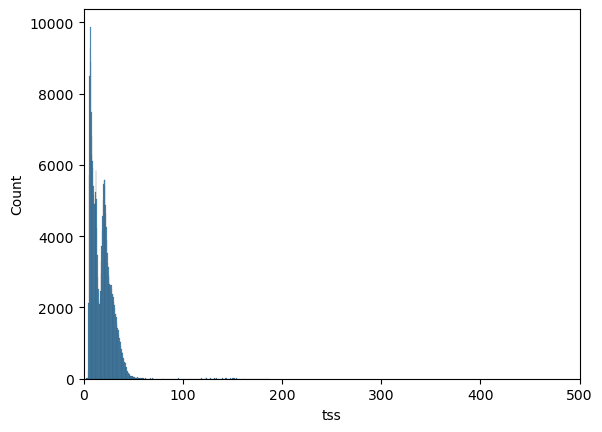

In [212]:
#Predicted TSS EXPLORE

print(prediction_df.tss.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=prediction_df, x="tss")
# set the x-axis limits
plt.xlim(0, 500)
# show the plot
plt.show()

# LS2 Performance Using Fusion Sites Only

# Define a Training and Testing Set



In [166]:
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat
ls2RF = df[['parameter', 'SiteID', 'huc', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red', 
         'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 
         'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 
         'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 
         'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat_cat','year', 'month', 'tss_log', 'B_RG_log',
         'R_GB_log', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']]

ls2RF = ls2RF[(ls2RF['Matchup'] == 'LS2')]

# One-hot encode the data using pandas get_dummies
df_parameter = pd.get_dummies(ls2RF['parameter'])
df_parameter_name = pd.get_dummies(ls2RF['parameter_name'])
df_units = pd.get_dummies(ls2RF['units'])
df_sat_cat = pd.get_dummies(ls2RF['sat_cat'])
df_SiteID = pd.get_dummies(ls2RF['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
ls2RF = pd.concat([ls2RF, df_parameter, df_parameter_name, df_units, df_sat_cat, df_SiteID], axis=1)

# drop original 'animal' column
ls2RF = ls2RF.drop(['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat', 'SiteID', 'tss', 'NS_NR'], axis=1)

print(ls2RF.head())

           huc        blue   green          red         nir       swir1  \
661  5140206.0  474.000000   783.0   612.528207  336.982002   60.976131   
662  5140206.0  645.000000   998.0  1026.076100  482.132702  142.000000   
663  5140206.0  426.391428   663.0   456.596162  602.829249  141.000000   
664  5140206.0  688.104637  1193.0  1394.214859  908.000000  140.000000   
665  5140206.0  635.000000  1169.0  1430.000000  922.000000  154.000000   

     swir2  pixelCount    blue_sd    green_sd  ...  WIDNR_WQX-093001  \
661   33.0       413.0  27.191910   29.309458  ...                 0   
662   91.0       421.0  31.152607   35.633949  ...                 0   
663   72.0       321.0  91.072299  131.607264  ...                 0   
664   93.0       473.0  30.831771   49.618324  ...                 0   
665  102.0       479.0  26.985008   43.432457  ...                 0   

     WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WIDNR_WQX-223282  \
661                   0            

In [167]:
#define a training and testing set
#aquaRF = df_model[(df_model['Matchup'] == 'AquaSat')] #& (hlsFusion['tss'] > 10)] 

labels = 'tss_log'
df_modelC = ls2RF.reset_index(drop=True).dropna(axis=0) #[['year', 'R_GB',
                 #'month', 'R_GB_log', 'tss_log']].reset_index(drop=True) 

df_modelC = df_modelC[np.isfinite(df_modelC).all(1)]

# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df_modelC[labels])
df_modelC = df_modelC.drop(labels, axis =1)
feature_list = list(df_modelC.columns)
X = np.array(df_modelC)

#define model
modelC = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

X_trainC, X_testC, y_trainC, y_testC = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainC.shape)
print(X_testC.shape)
print(y_trainC.shape)
print(y_testC.shape)

#Plot
# plot = sns.scatterplot(data=aquaRF, x="nir", y="tss_log", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="month")
# plt.legend(fontsize='10')
# plt.title(label = 'Reflectance vs TSS by Month')
# plot


# sns.set(font_scale=1)
# g = sns.FacetGrid(aquahuc_model, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
# g.add_legend()


(3926, 445)
(1309, 445)
(3926,)
(1309,)


In [242]:

# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelC, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
stdScoreC = std(n_scores)
meanScoreC = mean(n_scores)
print('MAE: %.6f (%.6f)' % (meanScoreC, stdScoreC))



KeyboardInterrupt: 

In [168]:
#Quick eval raw
modelC.fit(X_trainC, y_trainC)
print('Trained model oob score', modelC.oob_score_)

X_train_predictC=pd.DataFrame(modelC.predict(X_trainC))
predictionC = modelC.predict(X_testC)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictC=pd.DataFrame(
    modelC.predict(X_testC)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictC=pd.DataFrame(
    modelC.predict(X_trainC)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictC = pd.concat([X_train_predictC, X_test_predictC])

#Metrics for Model 1 

RMSE_modelC = np.sqrt(mean_squared_error(10**(y_testC), 10**(predictionC)))
trainC = modelC.score(X_trainC, y_trainC)
testC = modelC.score(X_testC, y_testC)
#Metrics
trainC = modelC.score(X_trainC, y_trainC)
testC = modelC.score(X_testC, y_testC)
print('Training score', round(trainC,2))
print('Testing score', round(testC,2))

print('RMSE', RMSE_modelC)

errorsTrainC = (abs(10**(modelC.predict(X_trainC)) - 10**(y_trainC))).mean()
print('Train MCE', round(errorsTrainC, 2))

RMSE_modelTrainC = np.sqrt(mean_squared_error(10**(y_trainC), 10**(modelC.predict(X_trainC))))
print('Train RMSE', round(RMSE_modelTrainC, 2))

RMSE_modelC = np.sqrt(mean_squared_error(10**(y_testC), 10**(predictionC)))
print('Test RMSE', round(RMSE_modelC, 2))

# Calculate the absolute errors
errorsC = (abs(10**(predictionC) - 10**(y_testC))).mean()
print('Test MCE', round(errorsC, 2))

# Calculate mean absolute percentage error (MCPE)
mapeTrainC = 100 * (errorsTrainC / 10**(y_trainC))
# Calculate and display accuracy
accuracyTrainC = 100 - np.mean(mapeTrainC)
#print('Train Cccuracy:', round(accuracyTrainC, 2), '%')

mapeC = 100 * (errorsC / 10**(y_testC))
# Calculate and display accuracy
accuracyC = 100 - np.mean(mapeC)

# calculate relative error
relative_error_testC = (abs(10**(y_testC) - 10**(predictionC)) / 10**(y_testC)) * 100
relative_error_trainC = (abs(10**(y_trainC) - 10**(modelC.predict(X_trainC))) / 10**(y_trainC)) * 100

# calculate mean relative error
mean_relative_error_trainC = np.mean(relative_error_trainC)
mean_relative_error_testC = np.mean(relative_error_testC)

print("Mean Train relative error:", mean_relative_error_trainC)
print("Mean Test relative error:", mean_relative_error_testC)


from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

#rRMSE = sqrt(mean((y_true - y_pred)**2) / mean(y_true**2))
rRMSE_modelTrainC = np.sqrt(np.mean((10**(y_trainC) - 10**(modelC.predict(X_trainC)))**2) / np.mean(10**(y_trainC)**2))
print('Train rRMSE', round(rRMSE_modelTrainC, 2))

rRMSE_modelC = np.sqrt(np.mean((10**(y_testC) - 10**(predictionC))**2) / np.mean(10**(y_testC)**2))
print('Test rRMSE', round(rRMSE_modelC, 2))

#NRMSE = sqrt(mean((y_true - y_pred)**2)) / (max(y_true) - min(y_true))
q1TrainC = pd.Series(10**(modelC.predict(X_trainC))).quantile(0.25)
q3TrainC = pd.Series(10**(modelC.predict(X_trainC))).quantile(0.75)
iqrTrainC = q3TrainC - q1TrainC

nRMSE_modelTrainC = np.sqrt(mean_squared_error(10**(y_trainC), 10**(modelC.predict(X_trainC)))) / iqrTrainC
print('Train nRMSE', round(nRMSE_modelTrainC, 2))

q1TestC = pd.Series(10**(predictionC)).quantile(0.25)
q3TestC = pd.Series(10**(predictionC)).quantile(0.75)
iqrTestC = q3TestC - q1TestC

nRMSE_modelC = np.sqrt(mean_squared_error(10**(y_testC), 10**(predictionC))) / iqrTestC
print('Test nRMSE', round(nRMSE_modelC, 2))

#CquaSat
feature_importanceC = modelC.feature_importances_
sorted_idx_aquaSat = np.argsort(feature_importanceC)
topFeats_aquaSat = df_model.columns[sorted_idx_aquaSat].values.tolist()
print(list(topFeats_aquaSat[-7:]))
print(topFeats_aquaSat[:-9:-1])
feats_aquaSat = topFeats_aquaSat[:-20:-1]




metricDict_LS2 = {'HUC': hucname,
              'Training Score': round(trainC, 2),
              'Testing Score': round(testC, 2),
              'Train MCE': round(errorsTrainC, 2),
              'Train RMSE': round(RMSE_modelTrainC, 2),
              'Train Relative Error': round(mean_relative_error_trainC, 2),
              'Test Relative Error': round(mean_relative_error_testC, 2),              
              'Test RMSE': round(RMSE_modelC, 2),
              'Test MCE': round(errorsC, 2),
              'Train rRMSE': round(rRMSE_modelTrainC, 2),
              'Test rRMSE': round(rRMSE_modelC, 2),
              'Train nRMSE': round(nRMSE_modelTrainC, 2),
              'Test nRMSE': round(nRMSE_modelC, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_LS2 =')

print(metricDict_LS2)

#             'Mean K Score': round(meanScoreC, 2),
#              'Std K Score': round(stdScoreC, 2),

Trained model oob score 0.7615916162679287
Training score 0.97
Testing score 0.79
RMSE 34.86451907809457
Train MCE 8.92
Train RMSE 17.03
Test RMSE 34.86
Test MCE 20.67
Mean Train relative error: 19.128636012225478
Mean Test relative error: 53.62941045024439
Train rRMSE 0.11
Test rRMSE 0.23
Train nRMSE 0.22
Test nRMSE 0.49
['Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'BR', 'p.sand', 'huc', 'GR2_log', 'red']
['red', 'GR2_log', 'huc', 'p.sand', 'BR', 'Total suspended solids', 'Suspended Sediment Concentration (SSC)', 'BR_G']
conus_LS2 =
{'HUC': 'conus', 'Training Score': 0.97, 'Testing Score': 0.79, 'Train MCE': 8.92, 'Train RMSE': 17.03, 'Train Relative Error': 19.13, 'Test Relative Error': 53.63, 'Test RMSE': 34.86, 'Test MCE': 20.67, 'Train rRMSE': 0.11, 'Test rRMSE': 0.23, 'Train nRMSE': 0.22, 'Test nRMSE': 0.49, 'Top 7 Features': ['red', 'GR2_log', 'huc', 'p.sand', 'BR', 'Total suspended solids', 'Suspended Sediment Concentration (SSC)', 'BR_G', 'Sediment', 'y

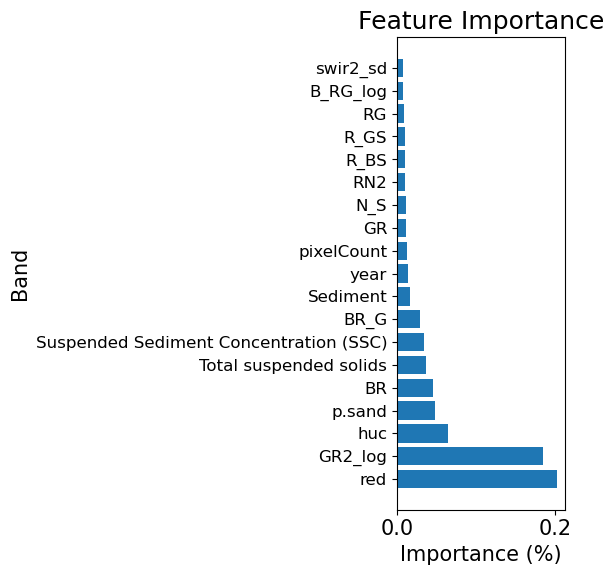

In [169]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 15})
feature_importanceC = modelC.feature_importances_
sorted_idxC = np.argsort(feature_importanceC)[:-20:-1]
pos = np.arange(sorted_idxC.shape[0]) + .5
fig = plt.figure(figsize=(6, 6))
plt.barh(pos, feature_importanceC[sorted_idxC], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(aquaRF.columns)[sorted_idxC], size = 12)
plt.title('Feature Importance')
fig.tight_layout()
plt.show()



In [ ]:
#Permutation Importance
# resultC = permutation_importance(modelC, X_testC, y_testC, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idxC1 = resultC.importances_mean.argsort()

# # Print the feature importances
# for i in sorted_idxC1[:-20:-1]:
#     print(f"{df_model.columns[i]:<8}"
#           f"{result.importances_mean[i]:.3f}"
#           f" +/- {result.importances_std[i]:.3f}")


In [170]:
#y_testA = 10**(y_testA)
#predictionA = 10**(predictionA)
#y_test = 10**(y_test)
#prediction = 10**(prediction)

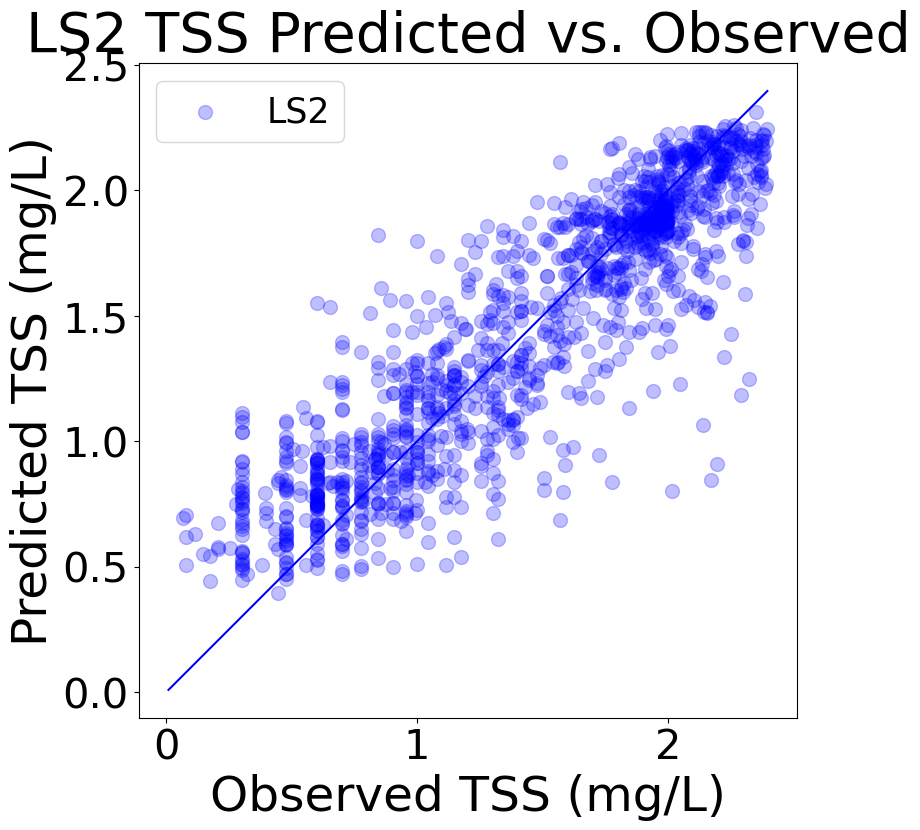

In [171]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testC), (predictionC), c='blue', label = 'LS2', alpha = 0.25, s = 100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('LS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


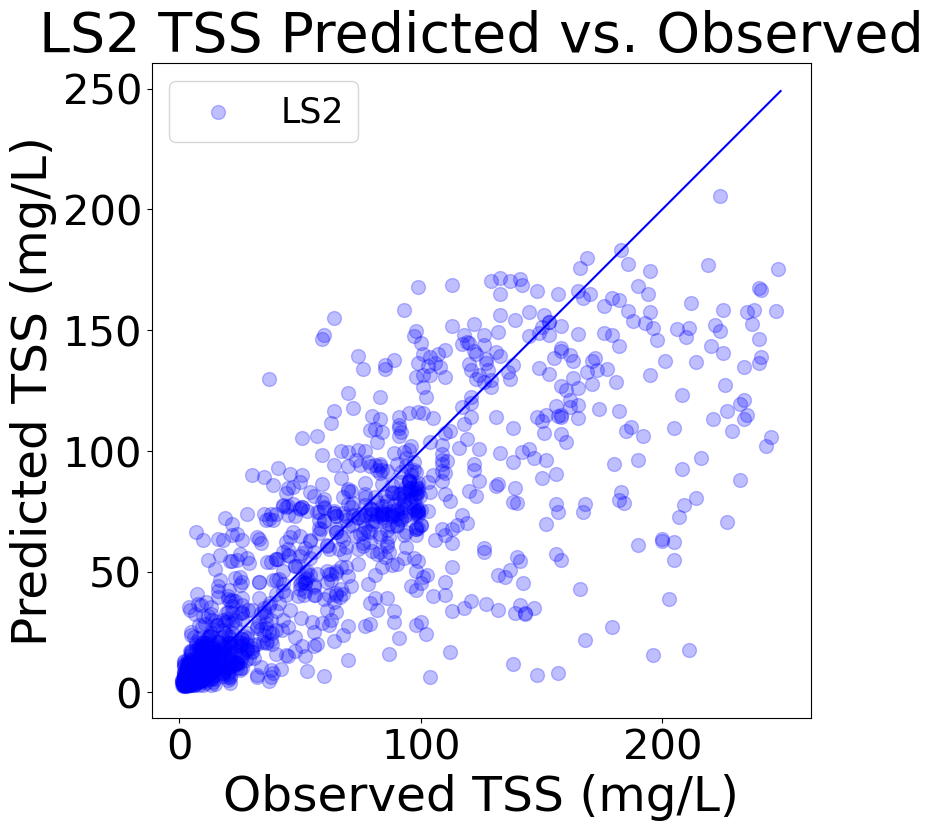

In [172]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter(10**(y_testC), 10**(predictionC), c='blue', label = 'LS2', alpha = 0.25, s = 100)

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('LS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


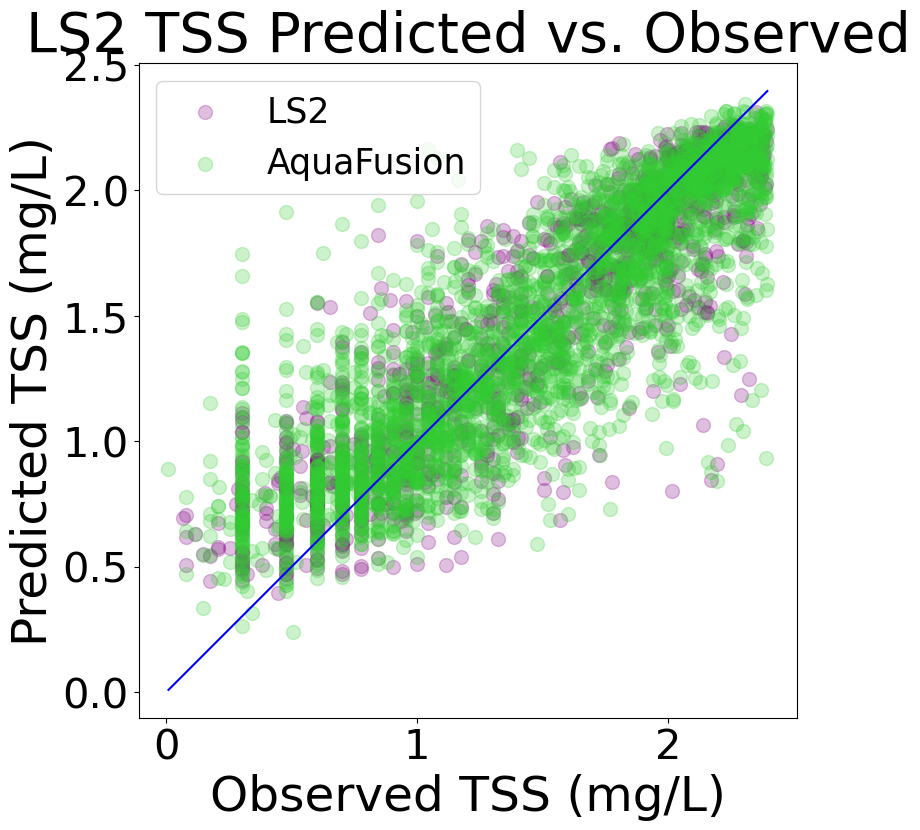

In [173]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testC), (predictionC), c='purple', label = 'LS2', alpha = 0.25, s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'AquaFusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('LS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


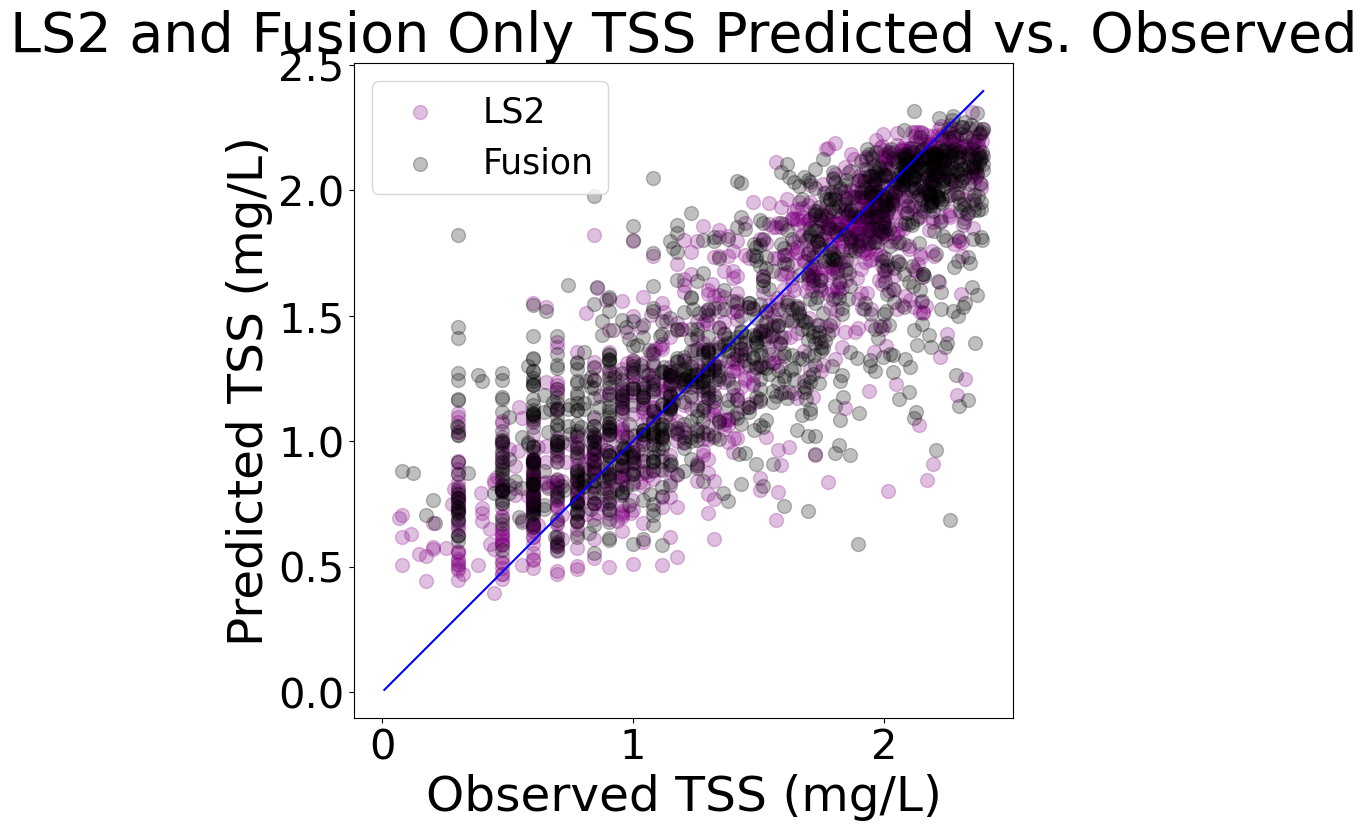

In [174]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testC), (predictionC), c='purple', label = 'LS2', alpha = 0.25, s = 100)
plt.scatter((y_testB), (predictionB), c='black', label = 'Fusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('LS2 and Fusion Only TSS Predicted vs. Observed', fontsize = 40)
plt.show()


20.667


Text(0.5, 1.0, 'Prediction Cbsolute Errors')

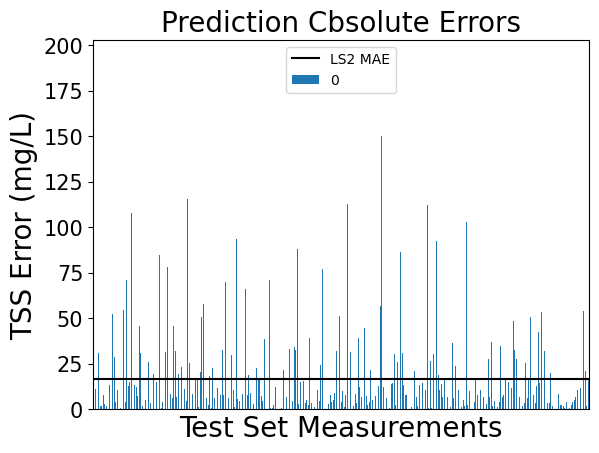

In [175]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errorsCabs = abs(10**(predictionC) - (10**(y_testC)))
maeC = float(format(mean(errorsCabs), '.3f'))
print(maeC)
pd.DataFrame(errorsCabs).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = 16.84, color = 'black', linestyle = '-', label = 'LS2 MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); plt.ylabel('TSS Error (mg/L)', fontsize = 20); plt.title('Prediction Cbsolute Errors', fontsize = 20)

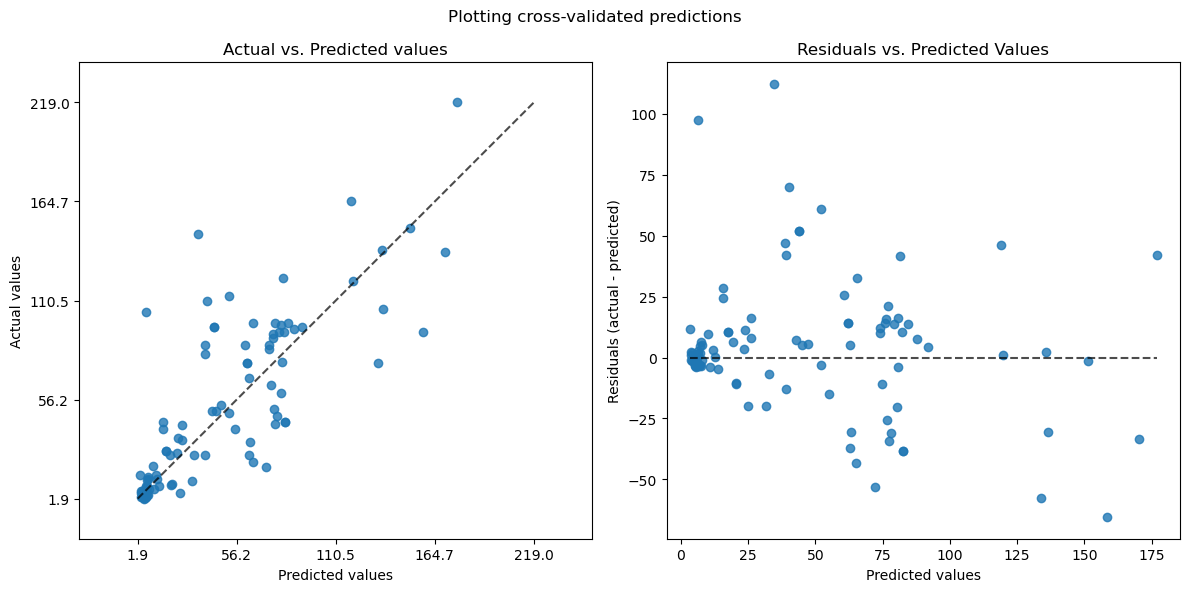

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
PredictionErrorDisplay.from_predictions(
    10**(y_testC),
    y_pred=10**(predictionC),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    10**(y_testC),
    y_pred=10**(predictionC),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [262]:

# save the model to a file
joblib.dump(modelC, '/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/LS2_model.joblib')



['/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/LS2_model.joblib']

# Predict LS2

In [324]:
# load the saved model from a file
loaded_regressor = joblib.load('LS2_model.joblib')

# Call in Fusion Data
file_list = glob.glob(os.path.join('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True).dropna(subset = ['red'])
dataframe = dataframe[(dataframe.red > 0) & (dataframe.pixelCount > 5) & (dataframe.nir > 0) & (dataframe.blue > 0) & (dataframe.green > 0) & 
                      (dataframe.swir1 > 0) & (dataframe.swir2 > 0) & (dataframe.nir > 0)]
fusionPredC = dataframe.drop(['dswe', 'source', 'Unnamed: 0', 'Matchup', 'NS_NR', 'sat'], axis=1)



In [325]:
#Merge the huc
allMatchups = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')

# Create a dictionary using the 'name' column as keys and the 'age' column as values
my_dict = dict(zip(allMatchups['SiteID'].values, allMatchups['huc'].values))

print(my_dict)


# use the map function to create a new column based on the dictionary
fusionPredC['huc'] = fusionPredC['SiteID'].map(my_dict)
#fusionPred = fusionPred.dropna(subset = ['huc'])


# Identify rows with values in the 'name' column that are not in the dictionary keys
mask = ~fusionPredC['SiteID'].isin(my_dict)

# Drop the rows that have values in the 'name' column not in the dictionary keys
fusionPredC.drop(fusionPredC[mask].index, inplace=True)

fusionPredC['huc']= fusionPredC.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling
fusionPredC['huc']= fusionPredC.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

print(fusionPredC)


print(fusionPredC.huc.value_counts())


#Check work
print(fusionPredC.loc[fusionPredC['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())
print(allMatchups.loc[allMatchups['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())


{'USGS-03612500': 5140206.0, 'USGS-03049625': 5010009.0, '21PA_WQX-WQN0905': 5030104.0, 'USGS-03216600': 5090103.0, '21PA_WQX-WQN0902': 5030101.0, '21PA_WQX-WQN0701': 5020005.0, 'USGS-03086000': 5030101.0, 'USGS-403909080221401': 5030101.0, '21PA_WQX-WQN0801': 5010009.0, '21VASWCB-9-NEW081.72': 5050001.0, '21VASWCB-9-NEW148.23': 5050001.0, '21VASWCB-9-NEW107.51': 5050001.0, '31ORWUNT_WQX-OR544.8M': 5090201.0, '31ORWUNT_WQX-OR7771M': 5030202.0, '31ORWUNT_WQX-OR7018M': 5090101.0, '31ORWUNT_WQX-OR204.9M': 5140201.0, '31ORWUNT_WQX-OR2603M': 5140201.0, '21VASWCB-9-NEW063.06': 5050001.0, 'USGS-03321500': 5110005.0, '21VASWCB-9-NEW127.49': 5050001.0, 'CEDEN-715CRIDG1': 15030104.0, 'USGS-09429490': 15030104.0, 'USGS-09421500': 15030101.0, 'USGS-09404200': 15010002.0, 'USGS-09427520': 15030104.0, 'USGS-09522000': 15030107.0, 'UTAHDWQ_WQX-4950640': 15010008.0, 'USGS-15292700': 19020503.0, 'USGS-15294350': 19020505.0, 'USGS-15292780': 19020505.0, 'USGS-15298040': 19030205.0, '21AWIC-142': 6030002

In [326]:
#Harmonize columns

#log columns
fusionPredC['GR2_log'] = np.log10(fusionPredC['GR2'])
fusionPredC['R_GB_log'] = np.log10(fusionPredC['R_GB'])
fusionPredC['B_RG_log'] = np.log10(fusionPredC['B_RG'])
fusionPredC['red_log'] = np.log10(fusionPredC['red'])
fusionPredC['green_log'] = np.log10(fusionPredC['green'])
fusionPredC['blue_log'] = np.log10(fusionPredC['blue'])
fusionPredC['nir_log'] = np.log10(fusionPredC['nir'])
fusionPredC['swir1_log'] = np.log10(fusionPredC['swir1'])
fusionPredC['swir2_log'] = np.log10(fusionPredC['swir2'])

#Add the one hot encoded variables manually (since there is only one variable)
fusionPredC['Sediment'] = 1
fusionPredC['Suspended Sediment Concentration (SSC)'] = 0
fusionPredC['Total suspended solids'] = 0
fusionPredC['p.sand'] = 0
fusionPredC['%'] = 0
fusionPredC['mg/l'] = 1
#fusionPredC['AquaSat'] = 0
#fusionPredC['Fusion'] = 1
#fusionPredC['LS2'] = 0
fusionPredC['F'] = 1
fusionPredC['L5'] = 0
fusionPredC['L7'] = 0
fusionPredC['L8'] = 0
fusionPredC['L9'] = 0
fusionPredC['S2'] = 0
print(fusionPredC.columns.values.tolist())

#One hot encode SiteID
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_SiteID = pd.get_dummies(fusionPredC['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionPredC = pd.concat([fusionPredC, df_SiteID], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
fusionPredC = fusionPredC.drop(['SiteID'], axis=1) #, 'SiteID', 'huc'

print(len(fusionPredC.columns.values.tolist()))



['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'R_GB_log', 'B_RG_log', 'huc', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log', 'Sediment', 'Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'p.sand', '%', 'mg/l', 'F', 'L5', 'L7', 'L8', 'L9', 'S2']
483


In [327]:
#Choose the common columns to the model

# keep only columns in fusionPRed that are in df_model
cols_to_keep = fusionPredC.columns[fusionPredC.columns.isin(df_modelC.columns)]
fusionPredC = fusionPredC[cols_to_keep]

# Find the different columns between the two dataframes
diff_colsC = set(df_modelC.columns) - set(fusionPredC.columns)

print(diff_colsC) # Output: {'A'} hopefully its empty

print(fusionPredC.head())
# print the result
print(fusionPredC.columns.values.tolist())
print(len(fusionPredC.columns))

set()
          blue       green         red         nir       swir1       swir2  \
1   512.384903  510.540634  513.576355  545.553925  433.609268  310.024353   
3   407.149429  497.107697  534.942429  497.662613  315.901779  398.569550   
10  185.096402  274.608905  185.685590  262.332196  151.452415  116.255924   
12  350.565521  270.734467  280.786926  390.755249  123.501022  122.298218   
13  287.650360  469.637421  365.500458  524.185913  126.099419   95.334610   

    pixelCount     blue_sd    green_sd      red_sd  ...  WIDNR_WQX-093001  \
1         52.0  211.842404  307.416325  282.524778  ...                 0   
3         40.0  330.371368  349.557302  337.497689  ...                 0   
10       155.0   89.360562  118.407291  153.589152  ...                 0   
12        25.0  295.532587  359.022765  353.007235  ...                 0   
13        34.0  315.719776  297.532329  339.196698  ...                 0   

    WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WI

In [328]:
#Check for column na's which bonk the RF

naSum = fusionPredC.isna().sum()
selected_cols = naSum[naSum > 0]
print(selected_cols)

print(fusionPredC.shape[0])
row_mask=fusionPredC.isnull().any(axis=1)
col_mask=fusionPredC.isnull().any(axis=0) 
print(fusionPredC.loc[row_mask,col_mask])

Series([], dtype: int64)
285279
Empty DataFrame
Columns: []
Index: []


In [329]:
#PREDICT as an array

fusionPredArr = fusionPredC.values
#use the loaded model to make predictions
predictions = loaded_regressor.predict(fusionPredArr)
print(10**(predictions))

# concatenate the array as a new column to the dataframe
prediction_df = pd.concat([fusionPredC[['huc', 'month', 'year', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount']].reset_index(), pd.DataFrame(10**(predictions), columns=['tss'])], axis=1)

#Save predictions
prediction_df.to_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusionPred_LS2Model.csv')

[14.12713838 14.26749853  6.9125466  ... 21.42948501  7.30399952
 23.10230773]


count    285279.000000
mean         21.583702
std          12.316041
min           3.629982
25%          10.571865
50%          20.608836
75%          29.040338
max          89.310065
Name: tss, dtype: float64


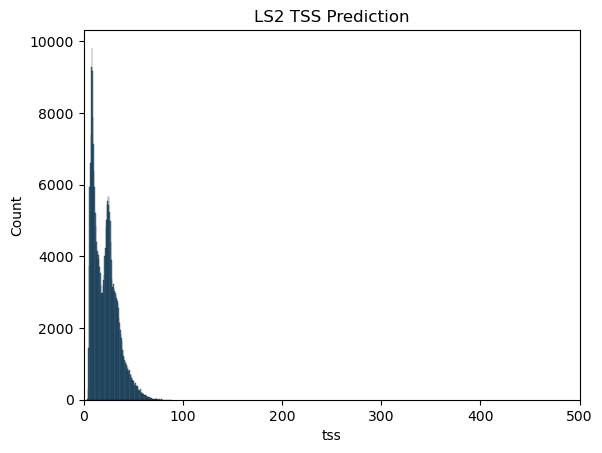

In [330]:
#Predicted TSS EXPLORE

print(prediction_df.tss.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=prediction_df, x="tss")
# set the x-axis limits
plt.xlim(0, 500)
plt.title('LS2 TSS Prediction')
# show the plot
plt.show()

# Aqua - LS2 Performance

# Define a Training and Testing Set



In [177]:
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat
aquaLs2_RF = df[['parameter', 'SiteID', 'huc', 'parameter_name', 'units', 'tss', 'blue', 'green', 'red',
         'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 
         'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 
         'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 
         'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sat_cat','year', 'month', 'tss_log', 'B_RG_log',
         'R_GB_log', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log']]

aquaLS2_RF = aquaLs2_RF[aquaLs2_RF['Matchup'].isin(['AquaSat', 'LS2'])]

# Print the selected rowspd.concat([aquaLs2_RF[(aquaLs2_RF.Matchup == 'LS2')], aquaLs2_RF[(aquaLs2_RF.Matchup == 'AquaSat')]], axis =1)
#aquaFusion[(aquaFusion.pixelCount > 10) & (aquaFusion.tss < thresholdTSS)
# One-hot encode the data using pandas get_dummies
df_parameter = pd.get_dummies(aquaLS2_RF['parameter'])
df_parameter_name = pd.get_dummies(aquaLS2_RF['parameter_name'])
df_Matchup = pd.get_dummies(aquaLS2_RF['Matchup'])
df_units = pd.get_dummies(aquaLS2_RF['units'])
df_sat_cat = pd.get_dummies(aquaLS2_RF['sat_cat'])
df_SiteID = pd.get_dummies(aquaLS2_RF['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
aquaLS2_RF = pd.concat([aquaLS2_RF, df_parameter, df_parameter_name, df_Matchup, df_units, df_sat_cat, df_SiteID], axis=1)

# drop original 'animal' column
aquaLS2_rf = aquaLS2_RF.drop(['parameter', 'parameter_name', 'units', 'Matchup', 'sat_cat', 'SiteID', 'tss', 'NS_NR'], axis=1)

print(aquaLS2_rf)
print(aquaLS2_rf.columns.values.tolist())

              huc        blue       green         red    nir  swir1  swir2  \
393     5020005.0  535.000000  602.000000  493.000000  523.0  265.0  201.0   
394     5020005.0  436.000000  636.000000  543.000000  410.0  100.0   51.0   
395     5020005.0  298.000000  388.000000  297.000000  323.0  110.0   71.0   
396     5020005.0  448.000000  591.000000  469.000000  434.0  233.0  202.0   
397     5020005.0  459.000000  552.000000  487.000000  519.0  286.0  242.0   
...           ...         ...         ...         ...    ...    ...    ...   
19458  17110020.0  420.000000  591.000000  630.000000  622.0  331.0  225.0   
19459  17110020.0  420.000000  591.000000  630.000000  622.0  331.0  225.0   
19460  17110020.0  399.000000  417.000000  404.000000  656.0  264.0  194.0   
19461  17110020.0  399.000000  417.000000  404.000000  656.0  264.0  194.0   
19462  17080005.0  504.666667  557.416667  484.343629  599.0  232.0  200.0   

       pixelCount     blue_sd    green_sd  ...  WIDNR_WQX-09300

In [178]:
#define a training and testing set
#aquaRF = df_model[(df_model['Matchup'] == 'AquaSat')] #& (hlsFusion['tss'] > 10)] 

labels = 'tss_log'
df_modelD = aquaLS2_rf.reset_index(drop=True).dropna(axis=0) #[['year', 'R_GB',
                 #'month', 'R_GB_log', 'tss_log']].reset_index(drop=True) 

df_modelD = df_modelD[np.isfinite(df_modelD).all(1)]

# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df_modelD[labels])
df_modelD = df_modelD.drop(labels, axis =1)
feature_list = list(df_modelD.columns)
X = np.array(df_modelD)

#define model
modelD = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

X_trainD, X_testD, y_trainD, y_testD = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainD.shape)
print(X_testD.shape)
print(y_trainD.shape)
print(y_testD.shape)

#Plot
# plot = sns.scatterplot(data=aquaRF, x="nir", y="tss_log", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="month")
# plt.legend(fontsize='10')
# plt.title(label = 'Reflectance vs TSS by Month')
# plot


# sns.set(font_scale=1)
# g = sns.FacetGrid(aquahuc_model, col="SiteID", hue = 'Matchup')
# g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
# g.add_legend()


(8337, 475)
(2779, 475)
(8337,)
(2779,)


In [73]:
#CROSS FOLD
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelD, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
stdScoreD = std(n_scores)
meanScoreD = mean(n_scores)
print('MAE: %.6f (%.6f)' % (meanScoreD, stdScoreD))


MAE: -0.296573 (0.008222)


# Random Forest Aquasat LS2

Target: TSS

Input Data: 6 Bands

In [179]:
#Quick eval raw
modelD.fit(X_trainD, y_trainD)
print('Trained model oob score', modelD.oob_score_)

X_train_predictD=pd.DataFrame(modelD.predict(X_trainD))
predictionD = modelD.predict(X_testD)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictD=pd.DataFrame(
    modelD.predict(X_testD)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictD=pd.DataFrame(
    modelD.predict(X_trainD)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictD = pd.concat([X_train_predictD, X_test_predictD])

#Metrics for Model 1 

RMSE_modelD = np.sqrt(mean_squared_error(10**(y_testD), 10**(predictionD)))
trainD = modelD.score(X_trainD, y_trainD)
testD = modelD.score(X_testD, y_testD)
#Metrics
trainD = modelD.score(X_trainD, y_trainD)
testD = modelD.score(X_testD, y_testD)
print('Training score', round(trainD,2))
print('Testing score', round(testD,2))

print('RMSE', RMSE_modelD)

errorsTrainD = (abs(10**(modelD.predict(X_trainD)) - 10**(y_trainD))).mean()
print('Train MDE', round(errorsTrainD, 2))

RMSE_modelTrainD = np.sqrt(mean_squared_error(10**(y_trainD), 10**(modelD.predict(X_trainD))))
print('Train RMSE', round(RMSE_modelTrainD, 2))

RMSE_modelD = np.sqrt(mean_squared_error(10**(y_testD), 10**(predictionD)))
print('Test RMSE', round(RMSE_modelD, 2))

# Dalculate the absolute errors
errorsD = (abs(10**(predictionD) - 10**(y_testD))).mean()
print('Test MDE', round(errorsD, 2))

# Dalculate mean absolute percentage error (MDPE)
mapeTrainD = 100 * (errorsTrainD / 10**(y_trainD))
# Dalculate and display accuracy
accuracyTrainD = 100 - np.mean(mapeTrainD)
#print('Train Dccuracy:', round(accuracyTrainD, 2), '%')

mapeD = 100 * (errorsD / 10**(y_testD))
# Dalculate and display accuracy
accuracyD = 100 - np.mean(mapeD)

# calculate relative error
relative_error_testD = (abs(10**(y_testD) - 10**(predictionD)) / 10**(y_testD)) * 100
relative_error_trainD = (abs(10**(y_trainD) - 10**(modelD.predict(X_trainD))) / 10**(y_trainD)) * 100

# calculate mean relative error
mean_relative_error_trainD = np.mean(relative_error_trainD)
mean_relative_error_testD = np.mean(relative_error_testD)

print("Mean Train relative error:", mean_relative_error_trainD)
print("Mean Test relative error:", mean_relative_error_testD)


from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

#rRMSE = sqrt(mean((y_true - y_pred)**2) / mean(y_true**2))
rRMSE_modelTrainD = np.sqrt(np.mean((10**(y_trainD) - 10**(modelD.predict(X_trainD)))**2) / np.mean(10**(y_trainD)**2))
print('Train rRMSE', round(rRMSE_modelTrainD, 2))

rRMSE_modelD = np.sqrt(np.mean((10**(y_testD) - 10**(predictionD))**2) / np.mean(10**(y_testD)**2))
print('Test rRMSE', round(rRMSE_modelD, 2))

#NRMSE = sqrt(mean((y_true - y_pred)**2)) / (max(y_true) - min(y_true))
q1TrainD = pd.Series(10**(modelD.predict(X_trainD))).quantile(0.25)
q3TrainD = pd.Series(10**(modelD.predict(X_trainD))).quantile(0.75)
iqrTrainD = q3TrainD - q1TrainD

nRMSE_modelTrainD = np.sqrt(mean_squared_error(10**(y_trainD), 10**(modelD.predict(X_trainD)))) / iqrTrainD
print('Train nRMSE', round(nRMSE_modelTrainD, 2))

q1TestD = pd.Series(10**(predictionD)).quantile(0.25)
q3TestD = pd.Series(10**(predictionD)).quantile(0.75)
iqrTestD = q3TestD - q1TestD

nRMSE_modelD = np.sqrt(mean_squared_error(10**(y_testD), 10**(predictionD))) / iqrTestD
print('Test nRMSE', round(nRMSE_modelD, 2))

#DquaSat
feature_importanceD = modelD.feature_importances_
sorted_idx_aquaSat = np.argsort(feature_importanceD)
topFeats_aquaSat = df_model.columns[sorted_idx_aquaSat].values.tolist()
print(list(topFeats_aquaSat[-7:]))
print(topFeats_aquaSat[:-9:-1])
feats_aquaSat = topFeats_aquaSat[:-20:-1]




metricDict_AquaLS2 = {'HUD': hucname,
              'Training Score': round(trainD, 2),
              'Testing Score': round(testD, 2),
              'Train MDE': round(errorsTrainD, 2),
              'Train RMSE': round(RMSE_modelTrainD, 2),
              'Train Relative Error': round(mean_relative_error_trainD, 2),
              'Test Relative Error': round(mean_relative_error_testD, 2),              
              'Test RMSE': round(RMSE_modelD, 2),
              'Test MDE': round(errorsD, 2),
              'Train rRMSE': round(rRMSE_modelTrainD, 2),
              'Test rRMSE': round(rRMSE_modelD, 2),
              'Train nRMSE': round(nRMSE_modelTrainD, 2),
              'Test nRMSE': round(nRMSE_modelD, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_AquaLS2 =')

print(metricDict_AquaLS2)


#              'Mean K Score': round(meanScoreD, 2),
#              'Std K Score': round(stdScoreD, 2),


Trained model oob score 0.7779554596658158
Training score 0.97
Testing score 0.79
RMSE 35.121574298227586
Train MDE 8.76
Train RMSE 16.97
Test RMSE 35.12
Test MDE 20.46
Mean Train relative error: 18.411871190439324
Mean Test relative error: 56.81543372188087
Train rRMSE 0.1
Test rRMSE 0.21
Train nRMSE 0.23
Test nRMSE 0.51
['GR', 'R_BS', 'BR', 'BR_G', 'huc', 'GR2_log', 'red']
['red', 'GR2_log', 'huc', 'BR_G', 'BR', 'R_BS', 'GR', 'Suspended Sediment Concentration (SSC)']
conus_AquaLS2 =
{'HUD': 'conus', 'Training Score': 0.97, 'Testing Score': 0.79, 'Train MDE': 8.76, 'Train RMSE': 16.97, 'Train Relative Error': 18.41, 'Test Relative Error': 56.82, 'Test RMSE': 35.12, 'Test MDE': 20.46, 'Train rRMSE': 0.1, 'Test rRMSE': 0.21, 'Train nRMSE': 0.23, 'Test nRMSE': 0.51, 'Top 7 Features': ['red', 'GR2_log', 'huc', 'BR_G', 'BR', 'R_BS', 'GR', 'Suspended Sediment Concentration (SSC)', 'AquaSat', 'Sediment', 'USGS-06236100', 'R_GS', 'year', 'pixelCount', 'USGS-06486000', 'N_S', 'RN2', 'mg/l', 'R

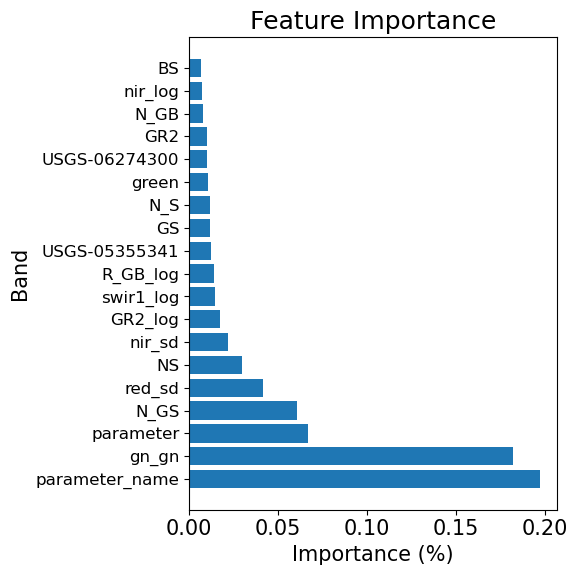

In [180]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 15})
feature_importanceD = modelD.feature_importances_
sorted_idxD = np.argsort(feature_importanceD)[:-20:-1]
pos = np.arange(sorted_idxD.shape[0]) + .5
fig = plt.figure(figsize=(6, 6))
plt.barh(pos, feature_importanceD[sorted_idxD], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(aquaLS2_RF.columns)[sorted_idxD], size = 12)
plt.title('Feature Importance')
fig.tight_layout()
plt.show()



In [76]:
# #Permutation Importance
# resultD = permutation_importance(modelD, X_testD, y_testD, n_repeats=10,
#                                 random_state=42, n_jobs=2)
# sorted_idxD1 = resultD.importances_mean.argsort()

# # Print the feature importances
# for i in sorted_idxD1[:-20:-1]:
#     print(f"{df_model.columns[i]:<8}"
#           f"{result.importances_mean[i]:.3f}"
#           f" +/- {result.importances_std[i]:.3f}")


huc     0.201 +/- 0.006
Sediment0.028 +/- 0.003
red     0.036 +/- 0.003
USGS-064860000.005 +/- 0.001
USGS-06236100-0.000 +/- 0.000
AquaSat 0.000 +/- 0.000
GR      0.013 +/- 0.001
GR2_log 0.025 +/- 0.003
R_BS    0.018 +/- 0.001
Suspended Sediment Concentration (SSC)0.073 +/- 0.004
BR      0.009 +/- 0.001
USGS-062647000.000 +/- 0.000
R_GS    0.006 +/- 0.000
R_GB    0.004 +/- 0.001
B_RG_log0.006 +/- 0.001
mg/l    0.003 +/- 0.000
USGS-091375000.000 +/- 0.000
N_S     0.005 +/- 0.001
USGS-132690000.000 +/- 0.000


In [123]:
#y_testA = 10**(y_testA)
#predictionA = 10**(predictionA)
#y_test = 10**(y_test)
#prediction = 10**(prediction)

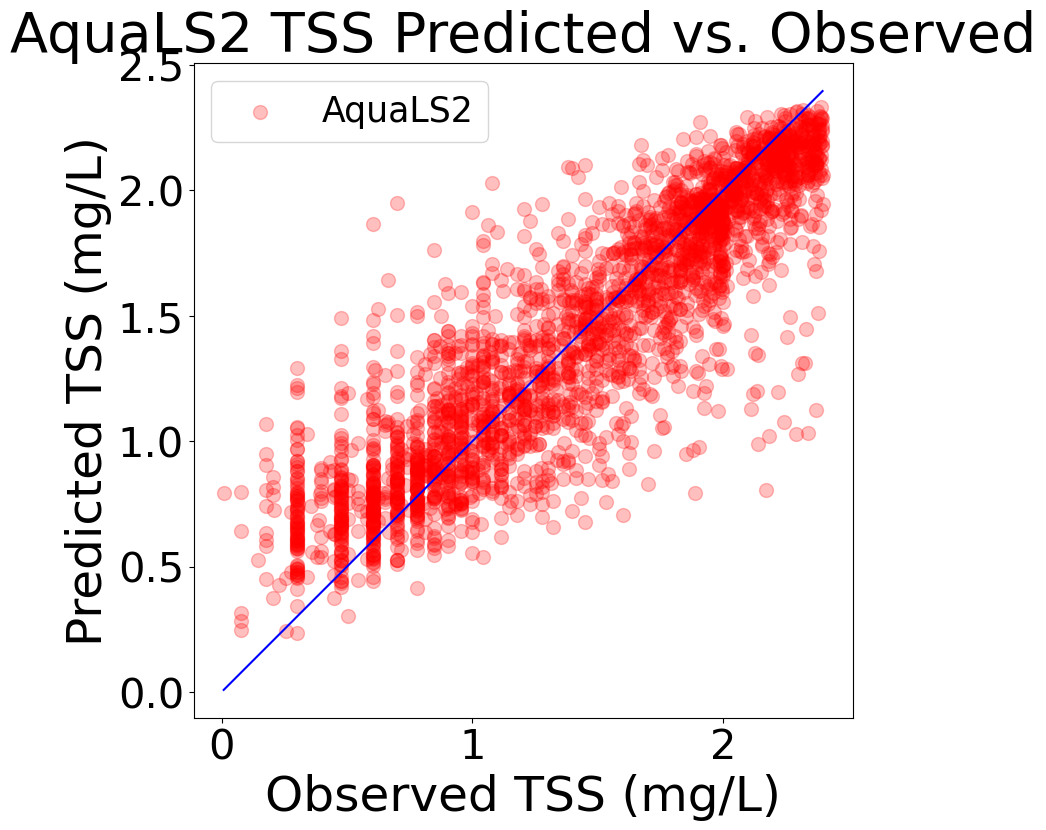

In [181]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testD), (predictionD), c='red', label = 'AquaLS2', alpha = 0.25, s = 100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('AquaLS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


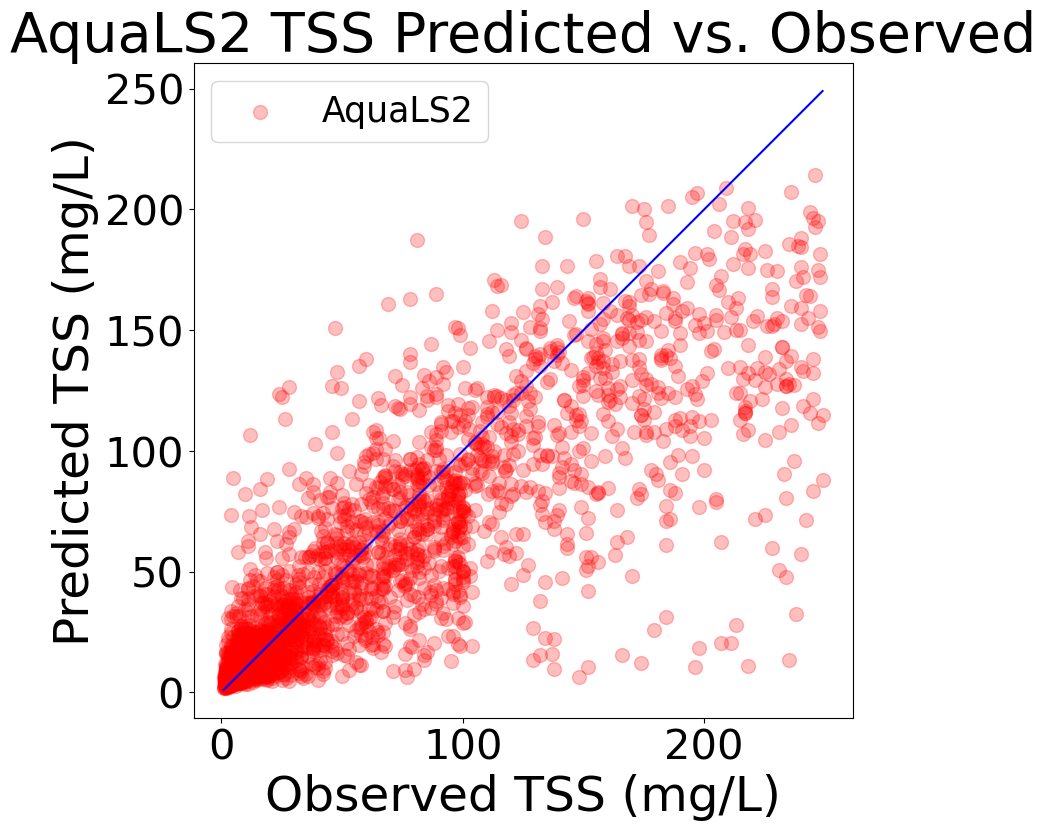

In [182]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter(10**(y_testD), 10**(predictionD), c='red', label = 'AquaLS2', alpha = 0.25, s = 100)

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('AquaLS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


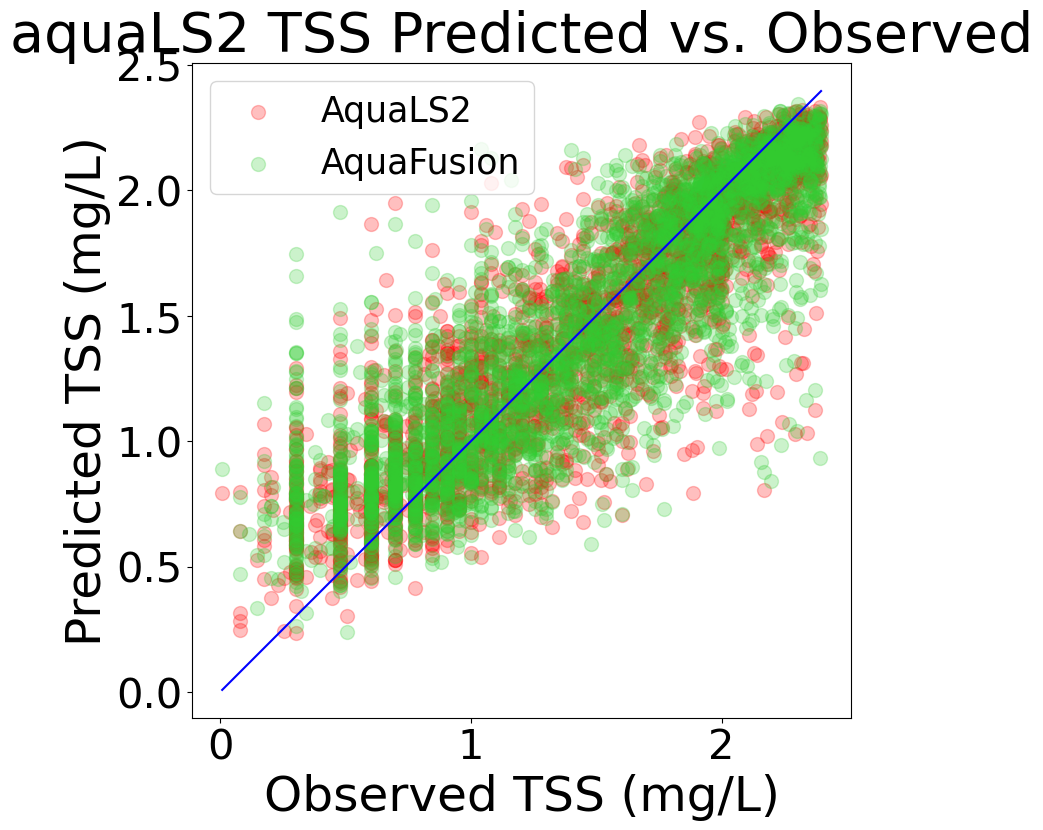

In [183]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testD), (predictionD), c='red', label = 'AquaLS2', alpha = 0.25, s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'AquaFusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('aquaLS2 TSS Predicted vs. Observed', fontsize = 40)
plt.show()


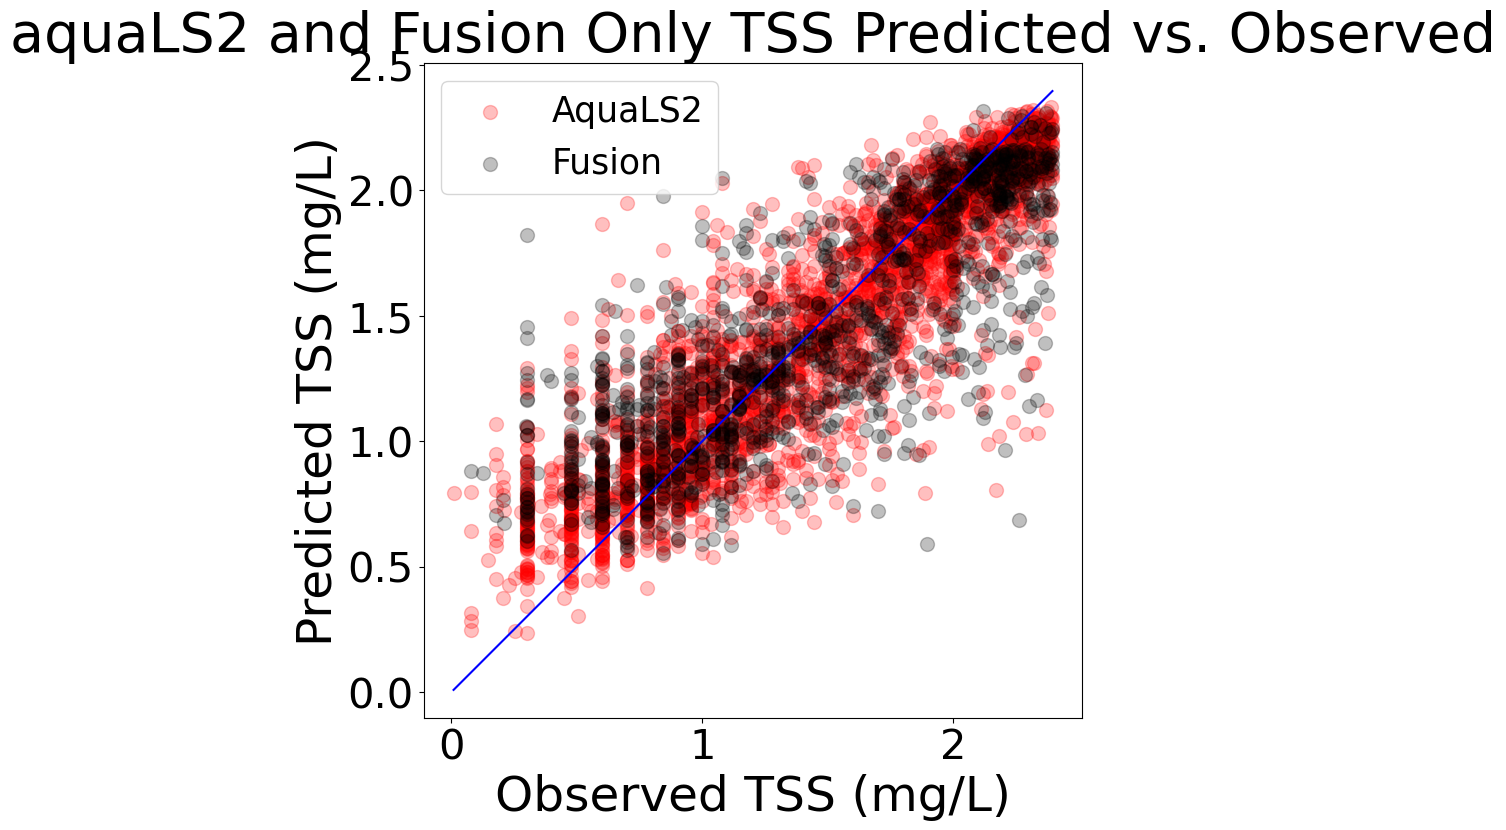

In [184]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testD), (predictionD), c='red', label = 'AquaLS2', alpha = 0.25, s = 100)
plt.scatter((y_testB), (predictionB), c='black', label = 'Fusion', alpha = 0.25, s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('aquaLS2 and Fusion Only TSS Predicted vs. Observed', fontsize = 40)
plt.show()


20.46


Text(0.5, 1.0, 'Prediction Absolute Errors')

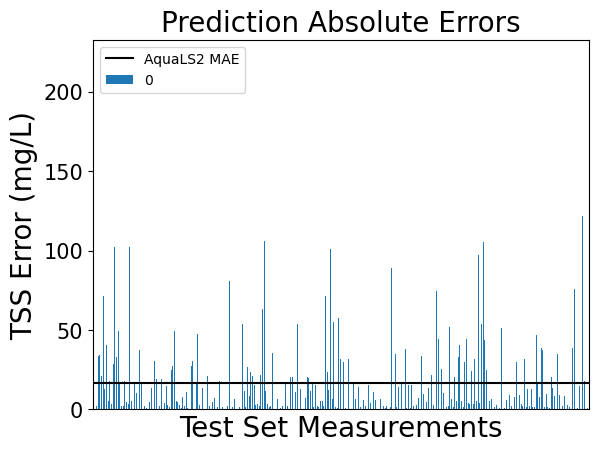

In [185]:
#Plot the 'difference' between true and prediction
# Dalculate the absolute errors
errorsDabs = abs(10**(predictionD) - (10**(y_testD)))
maeD = float(format(mean(errorsDabs), '.3f'))
print(maeD)
pd.DataFrame(errorsDabs).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = 16.84, color = 'black', linestyle = '-', label = 'AquaLS2 MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); plt.ylabel('TSS Error (mg/L)', fontsize = 20); plt.title('Prediction Absolute Errors', fontsize = 20)

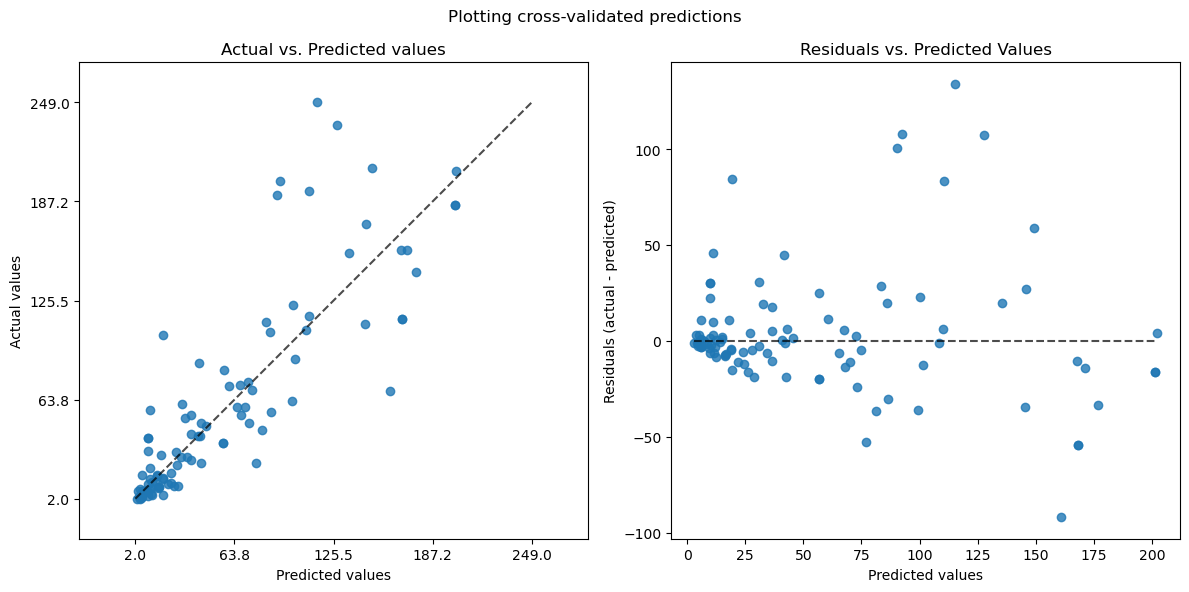

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
PredictionErrorDisplay.from_predictions(
    10**(y_testD),
    y_pred=10**(predictionD),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    10**(y_testD),
    y_pred=10**(predictionD),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [283]:

# save the model to a file
joblib.dump(modelD, '/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaLS2_model.joblib')



['/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/aquaLS2_model.joblib']

# Predict aquaLS2

In [331]:
# load the saved model from a file
loaded_regressor = joblib.load('aquaLS2_model.joblib')

# Call in Fusion Data
file_list = glob.glob(os.path.join('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True).dropna(subset = ['red'])
dataframe = dataframe[(dataframe.red > 0) & (dataframe.pixelCount > 5) & (dataframe.nir > 0) & (dataframe.blue > 0) & (dataframe.green > 0) & 
                      (dataframe.swir1 > 0) & (dataframe.swir2 > 0) & (dataframe.nir > 0)]
fusionPredD = dataframe.drop(['dswe', 'source', 'Unnamed: 0', 'NS_NR', 'sat'], axis=1)



In [332]:
#Merge the huc
allMatchups = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups_2013-2023_clean.csv')

# Create a dictionary using the 'name' column as keys and the 'age' column as values
my_dict = dict(zip(allMatchups['SiteID'].values, allMatchups['huc'].values))

print(my_dict)


# use the map function to create a new column based on the dictionary
fusionPredD['huc'] = fusionPredD['SiteID'].map(my_dict)
#fusionPred = fusionPred.dropna(subset = ['huc'])


# Identify rows with values in the 'name' column that are not in the dictionary keys
mask = ~fusionPredD['SiteID'].isin(my_dict)

# Drop the rows that have values in the 'name' column not in the dictionary keys
fusionPredD.drop(fusionPredD[mask].index, inplace=True)

fusionPredD['huc']= fusionPredD.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling
fusionPredD['huc']= fusionPredD.groupby('SiteID')['huc'].fillna(method='ffill')  # use 'bfill' for backward filling

print(fusionPredD)


print(fusionPredD.huc.value_counts())


#Check work
print(fusionPredD.loc[fusionPredD['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())
print(allMatchups.loc[allMatchups['SiteID'] == 'LUMMINSN_WQX-LUMMI0173', 'huc'].unique())


{'USGS-03612500': 5140206.0, 'USGS-03049625': 5010009.0, '21PA_WQX-WQN0905': 5030104.0, 'USGS-03216600': 5090103.0, '21PA_WQX-WQN0902': 5030101.0, '21PA_WQX-WQN0701': 5020005.0, 'USGS-03086000': 5030101.0, 'USGS-403909080221401': 5030101.0, '21PA_WQX-WQN0801': 5010009.0, '21VASWCB-9-NEW081.72': 5050001.0, '21VASWCB-9-NEW148.23': 5050001.0, '21VASWCB-9-NEW107.51': 5050001.0, '31ORWUNT_WQX-OR544.8M': 5090201.0, '31ORWUNT_WQX-OR7771M': 5030202.0, '31ORWUNT_WQX-OR7018M': 5090101.0, '31ORWUNT_WQX-OR204.9M': 5140201.0, '31ORWUNT_WQX-OR2603M': 5140201.0, '21VASWCB-9-NEW063.06': 5050001.0, 'USGS-03321500': 5110005.0, '21VASWCB-9-NEW127.49': 5050001.0, 'CEDEN-715CRIDG1': 15030104.0, 'USGS-09429490': 15030104.0, 'USGS-09421500': 15030101.0, 'USGS-09404200': 15010002.0, 'USGS-09427520': 15030104.0, 'USGS-09522000': 15030107.0, 'UTAHDWQ_WQX-4950640': 15010008.0, 'USGS-15292700': 19020503.0, 'USGS-15294350': 19020505.0, 'USGS-15292780': 19020505.0, 'USGS-15298040': 19030205.0, '21AWIC-142': 6030002

In [333]:
#Harmonize columns

#log columns
fusionPredD['GR2_log'] = np.log10(fusionPredD['GR2'])
fusionPredD['R_GB_log'] = np.log10(fusionPredD['R_GB'])
fusionPredD['B_RG_log'] = np.log10(fusionPredD['B_RG'])
fusionPredD['red_log'] = np.log10(fusionPredD['red'])
fusionPredD['green_log'] = np.log10(fusionPredD['green'])
fusionPredD['blue_log'] = np.log10(fusionPredD['blue'])
fusionPredD['nir_log'] = np.log10(fusionPredD['nir'])
fusionPredD['swir1_log'] = np.log10(fusionPredD['swir1'])
fusionPredD['swir2_log'] = np.log10(fusionPredD['swir2'])

#Add the one hot encoded variables manually (since there is only one variable)
fusionPredD['Sediment'] = 1
fusionPredD['Suspended Sediment Concentration (SSC)'] = 0
fusionPredD['Total suspended solids'] = 0
fusionPredD['p.sand'] = 0
fusionPredD['%'] = 0
fusionPredD['mg/l'] = 1
fusionPredD['AquaSat'] = 0
#fusionPredD['Fusion'] = 1
fusionPredD['LS2'] = 0
fusionPredD['F'] = 1
fusionPredD['L5'] = 0
fusionPredD['L7'] = 0
fusionPredD['L8'] = 0
fusionPredD['L9'] = 0
fusionPredD['S2'] = 0
print(fusionPredD.columns.values.tolist())

#One hot encode SiteID
#One hot encode cat vars including: parameter, parameter name, units, matchup, sat_cat

# One-hot encode the data using pandas get_dummies
df_SiteID = pd.get_dummies(fusionPredD['SiteID'])


# concatenate original dataframe with one-hot encoded 'animal' column
fusionPredD = pd.concat([fusionPredD, df_SiteID, df_Matchup], axis=1) #, df_huc, df_SiteID

# drop original 'animal' column
fusionPredD = fusionPredD.drop(['SiteID', 'Matchup'], axis=1) #, 'SiteID', 'huc'

print(len(fusionPredD.columns.values.tolist()))
print(fusionPredD.columns.values.tolist())



['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year', 'month', 'R_GB_log', 'B_RG_log', 'huc', 'GR2_log', 'red_log', 'green_log', 'blue_log', 'nir_log', 'swir1_log', 'swir2_log', 'Sediment', 'Suspended Sediment Concentration (SSC)', 'Total suspended solids', 'p.sand', '%', 'mg/l', 'AquaSat', 'LS2', 'F', 'L5', 'L7', 'L8', 'L9', 'S2']
486
['date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR

In [334]:
#Choose the common columns to the model

# keep only columns in fusionPRed that are in df_model
cols_to_keep = fusionPredD.columns[fusionPredD.columns.isin(df_modelD.columns)]
fusionPredD = fusionPredD[cols_to_keep]

# Find the different columns between the two dataframes
diff_colsD = set(df_modelD.columns) - set(fusionPredD.columns)

print(diff_colsD) # Output: {'A'} hopefully its empty

print(fusionPredD.head())
# print the result
print(fusionPredD.columns.values.tolist())
print(len(fusionPredD.columns))

set()
          blue       green         red         nir       swir1       swir2  \
1   512.384903  510.540634  513.576355  545.553925  433.609268  310.024353   
3   407.149429  497.107697  534.942429  497.662613  315.901779  398.569550   
10  185.096402  274.608905  185.685590  262.332196  151.452415  116.255924   
12  350.565521  270.734467  280.786926  390.755249  123.501022  122.298218   
13  287.650360  469.637421  365.500458  524.185913  126.099419   95.334610   

    pixelCount     blue_sd    green_sd      red_sd  ...  WIDNR_WQX-093001  \
1         52.0  211.842404  307.416325  282.524778  ...                 0   
3         40.0  330.371368  349.557302  337.497689  ...                 0   
10       155.0   89.360562  118.407291  153.589152  ...                 0   
12        25.0  295.532587  359.022765  353.007235  ...                 0   
13        34.0  315.719776  297.532329  339.196698  ...                 0   

    WIDNR_WQX-10031139  WIDNR_WQX-123016  WIDNR_WQX-173208  WI

In [335]:
#Check for column na's which bonk the RF

naSum = fusionPredD.isna().sum()
selected_cols = naSum[naSum > 0]
print(selected_cols)

print(fusionPredD.shape[0])
row_mask=fusionPredD.isnull().any(axis=1)
col_mask=fusionPredD.isnull().any(axis=0) 
print(fusionPredD.loc[row_mask,col_mask])

Series([], dtype: int64)
285279
Empty DataFrame
Columns: []
Index: []


In [336]:
#PREDICT as an array

fusionPredArr = fusionPredD.values
#use the loaded model to make predictions
predictions = loaded_regressor.predict(fusionPredArr)
print(10**(predictions))

# concatenate the array as a new column to the dataframe
prediction_df = pd.concat([fusionPredD[['huc', 'month', 'year', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount']].reset_index(), pd.DataFrame(10**(predictions), columns=['tss'])], axis=1)

#Save predictions
prediction_df.to_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/fusionPred_aquaLS2Model.csv')

[30.42514645 35.7634075  38.04441083 ... 37.46724217 29.66247708
 24.24079335]


count    285279.000000
mean         39.753472
std           8.853429
min           7.386282
25%          34.484345
50%          38.798923
75%          43.588695
max         116.139640
Name: tss, dtype: float64


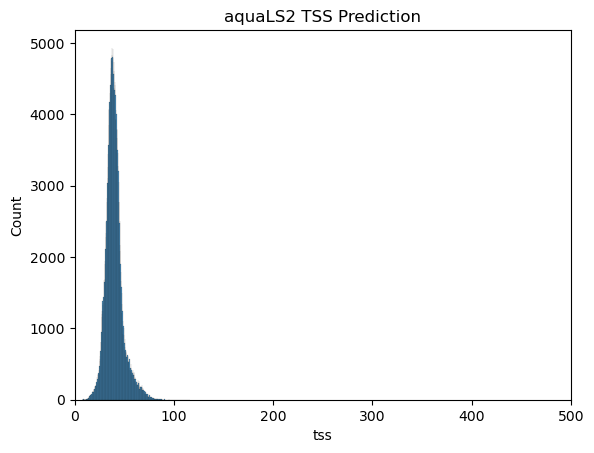

In [337]:
#Predicted TSS EXPLORE

print(prediction_df.tss.describe())

#print(prediction_df.shape[0])
#print(site)
#print(hucs.sort_values(by = 'date'))
sns.histplot(data=prediction_df, x="tss")
# set the x-axis limits
plt.xlim(0, 500)
plt.title('aquaLS2 TSS Prediction')
# show the plot
plt.show()

# Metrics

In [106]:
#MATCHUP DICTIONARY
hucname = 'conus'
matchupDict = {'HUC': hucname,
               'Number of Sites': (df.SiteID.nunique()),
               'Number AquaSat Matchups': len(df[df['Matchup'] == 'AquaSat']) ,
               'Number LS2 Matchups': len(df[df['Matchup'] == 'LS2']) ,
               'Number Fusion Matchups':  len(df[df['Matchup'] == 'Fusion']),
               'Number Fusion Unmatched': 0,
               'Number WQP Unmatched': 0
              }
print(hucname + '_matchups = ')
print(matchupDict)

#AquaFusion
metricDict_aquaFusion = {'HUC': 'conus',
              'Training Score': round(train, 2),
              'Testing Score': round(test, 2),
              'Train MAE': round(errorsTrain, 2),
              'Train Relative Error': round(mean_relative_error_train, 2),
              'Test Relative Error': round(mean_relative_error_test, 2),
              'Train RMSE': round(RMSE_modelTrain, 2),
              'Test RMSE': round(RMSE_model, 2),
              'Test MAE': round(errors, 2),
              'Train rRMSE': round(rRMSE_modelTrain, 2),
              'Test rRMSE': round(rRMSE_model, 2),
              'Train nRMSE': round(nRMSE_modelTrain, 2),
              'Test nRMSE': round(nRMSE_model, 2),
              'Top 20 Features': feats_aquaFusion
             }
print(hucname + '_aquaFusion =')
print(metricDict_aquaFusion)

#Fusion
metricDict_fusion = {'HUC': hucname,              
              'Training Score': round(trainB, 2),
              'Testing Score': round(testB, 2),
              'Mean K Score': round(meanScoreB, 4),
              'Std K Score': round(stdScoreB, 4),
              'Train MAE': round(errorsTrainB, 2),
              'Train RMSE': round(RMSE_modelTrainB, 2),
              'Train Relative Error': round(mean_relative_error_trainB, 2),
              'Test Relative Error': round(mean_relative_error_testB, 2),
              'Test RMSE': round(RMSE_modelB, 2),
              'Test MAE': round(errorsB, 2),
              'Train rRMSE': round(rRMSE_modelTrainB, 2),
              'Test rRMSE': round(rRMSE_modelB, 2),
              'Train nRMSE': round(nRMSE_modelTrainB, 2),
              'Test nRMSE': round(nRMSE_modelB, 2),
              'Top 7 Features': feats_fusion
             }
print(hucname + '_fusion =')

print(metricDict_fusion)


#AquaSat
metricDict_aquaSat = {'HUC': hucname,
              'Training Score': round(trainA, 2),
              'Testing Score': round(testA, 2),
              # 'Mean K Score': round(meanScoreA, 4),
              # 'Std K Score': round(stdScoreA, 4),
              'Train MAE': round(errorsTrainA, 2),
              'Train RMSE': round(RMSE_modelTrainA, 2),
              'Train Relative Error': round(mean_relative_error_trainA, 2),
              'Test Relative Error': round(mean_relative_error_testA, 2),
              'Test RMSE': round(RMSE_modelA, 2),
              'Test MAE': round(errorsA, 2),
              'Train rRMSE': round(rRMSE_modelTrainA, 2),
              'Test rRMSE': round(rRMSE_modelA, 2),
              'Train nRMSE': round(nRMSE_modelTrainA, 2),
              'Test nRMSE': round(nRMSE_modelA, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_aquaSat =')
print(metricDict_aquaSat)


metricDict_LS2 = {'HUC': hucname,
              'Training Score': round(trainC, 2),
              'Testing Score': round(testC, 2),
              # 'Mean K Score': round(meanScoreC, 4),
              # 'Std K Score': round(stdScoreC, 4),
              'Train MCE': round(errorsTrainC, 2),
              'Train RMSE': round(RMSE_modelTrainC, 2),
              'Train Relative Error': round(mean_relative_error_trainC, 2),
              'Test Relative Error': round(mean_relative_error_testC, 2),
              'Test RMSE': round(RMSE_modelC, 2),
              'Test MCE': round(errorsC, 2),
              'Train rRMSE': round(rRMSE_modelTrainC, 2),
              'Test rRMSE': round(rRMSE_modelC, 2),
              'Train nRMSE': round(nRMSE_modelTrainC, 2),
              'Test nRMSE': round(nRMSE_modelC, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_LS2 =')

print(metricDict_LS2)




metricDict_AquaLS2 = {'HUD': hucname,
              'Training Score': round(trainD, 2),
              'Testing Score': round(testD, 2),
              # 'Mean K Score': round(meanScoreD, 4),
              # 'Std K Score': round(stdScoreD, 4),
              'Train MAE': round(errorsTrainD, 2),
              'Train RMSE': round(RMSE_modelTrainD, 2),
              'Train Relative Error': round(mean_relative_error_trainD, 2),
              'Test Relative Error': round(mean_relative_error_testD, 2),
              'Test RMSE': round(RMSE_modelD, 2),
              'Test MDE': round(errorsD, 2),
              'Train rRMSE': round(rRMSE_modelTrainD, 2),
              'Test rRMSE': round(rRMSE_modelD, 2),
              'Train nRMSE': round(nRMSE_modelTrainD, 2),
              'Test nRMSE': round(nRMSE_modelD, 2),
              'Top 7 Features': feats_aquaSat
             }
print(hucname + '_AquaLS2 =')

print(metricDict_AquaLS2)

conus_matchups = 
{'HUC': 'conus', 'Number of Sites': 393, 'Number AquaSat Matchups': 6808, 'Number LS2 Matchups': 6027, 'Number Fusion Matchups': 5743, 'Number Fusion Unmatched': 0, 'Number WQP Unmatched': 0}
conus_aquaFusion =
{'HUC': 'conus', 'Training Score': 0.97, 'Testing Score': 0.8, 'Train MAE': 24.56, 'Train Relative Error': 21.22, 'Test Relative Error': 64.46, 'Train RMSE': 76.84, 'Test RMSE': 124.49, 'Test MAE': 49.65, 'Train rRMSE': 0.0, 'Test rRMSE': 0.01, 'Train nRMSE': 0.61, 'Test nRMSE': 1.05, 'Top 20 Features': ['GR2_log', 'red', 'huc', 'RG', 'USGS-06652000', 'GR', 'Suspended Sediment Concentration (SSC)', 'RN2', 'BR', 'Sediment', 'R_BS', 'USGS-06453305', 'BR_G', 'year', 'N_S', 'R_GS', 'pixelCount', 'red_sd', 'swir2_sd']}
conus_fusion =
{'HUC': 'conus', 'Training Score': 0.96, 'Testing Score': 0.72, 'Mean K Score': -0.3594, 'Std K Score': 0.0163, 'Train MAE': 29.29, 'Train RMSE': 88.31, 'Train Relative Error': 25.23, 'Test Relative Error': 86.2, 'Test RMSE': 171.44, 'T

In [84]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

# Regressions

/scratch/ceewater-cpu001/7127243/ipykernel_1143117/3400127014.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))
/scratch/ceewater-cpu001/7127243/ipykernel_1143117/3400127014.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))
/scratch/ceewater-cpu001/7127243/ipykernel_1143117/3400127014.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))
/scratch/ceewater-cpu001/7127243/ipykernel_1143117/3400127014.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))
/scratch/ceewater-cpu001/7127243/ipykernel_1143117/3400127014.py

393
['SiteID', 'intercept', 'coefficients', 'pvalues', 'fvalue', 'f_pvalue', 'R_squared']
['USGS-03612500', 'USGS-03049625', '21PA_WQX-WQN0905', 'USGS-03216600', '21PA_WQX-WQN0902', '21PA_WQX-WQN0701', 'USGS-03086000', 'USGS-403909080221401', '21PA_WQX-WQN0801', '21VASWCB-9-NEW081.72', '21VASWCB-9-NEW148.23', '21VASWCB-9-NEW107.51', '31ORWUNT_WQX-OR544.8M', '31ORWUNT_WQX-OR7771M', '31ORWUNT_WQX-OR7018M', '31ORWUNT_WQX-OR204.9M', '31ORWUNT_WQX-OR2603M', '21VASWCB-9-NEW063.06', 'USGS-03321500', '21VASWCB-9-NEW127.49', 'CEDEN-715CRIDG1', 'USGS-09429490', 'USGS-09421500', 'USGS-09404200', 'USGS-09427520', 'USGS-09522000', 'UTAHDWQ_WQX-4950640', 'USGS-15292700', 'USGS-15294350', 'USGS-15292780', 'USGS-15298040', '21AWIC-142', '21AWIC-124', '21AWIC-154', '21AWIC-3872', '21AWIC-122', '21AWIC-8111', '21AWIC-119', 'USGS-03609750', '21AWIC-123', '21AWIC-49', '21AWIC-155', '21AWIC-133', '21AWIC-168', '31ORWUNT_WQX-TR-5.0M', '21AWIC-7430', 'USGS-08067000', 'USGS-08067252', 'USGS-08162501', 'USGS-0

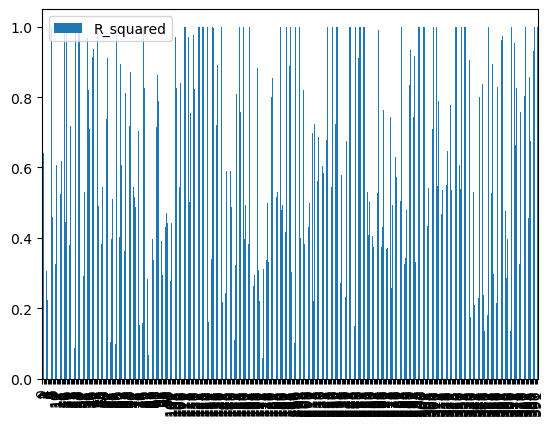

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def perform_linear_regression(df, dependent_variable, independent_variables):
    # drop rows with missing values in any of the independent or dependent variables
    df = df.dropna(subset=[dependent_variable] + independent_variables)

    # loop over unique sites in the 'site' column and perform linear regression for each site
    results = []
    for site in df['SiteID'].unique():
        # select rows for the current site
        site_df = df[df['SiteID'] == site]

        # fit a linear regression model using OLS
        X = site_df[independent_variables]
        X = sm.add_constant(X)  # add a constant term to the model
        y = site_df[dependent_variable]
        model = sm.OLS(y, X).fit()

        # calculate R-squared value for the model
        y_predicted = model.predict(X)
        y_actual = y
        r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))

        # store the results in a dictionary
        result = {
            'SiteID': site,
            'intercept': model.params[0],
            'coefficients': model.params[1:],
            'pvalues': model.pvalues[1:],
            'fvalue': model.fvalue,
            'f_pvalue': model.f_pvalue,
            'R_squared': r_squared
        }
        results.append(result)

    # return the results as a DataFrame
    return pd.DataFrame(results)

df = df.replace([np.inf, -np.inf], np.nan)
df =  df.dropna(subset = ['tss_log','red', 'GR2_log', 'huc', 'year', 'R_BS', 'month', 'BR_G', 'R_GB'])

results = perform_linear_regression(df, 'tss_log', ['red', 'GR2_log', 'huc', 'year', 'R_BS', 'month', 'BR_G', 'R_GB'])
r_squared = results.R_squared.replace([np.inf, -np.inf], np.nan).dropna()


print(results.shape[0])
print(results.columns.values.tolist())
print(results.SiteID.values.tolist())
print(r_squared.values.mean())
pd.DataFrame((r_squared)).plot(kind='bar')

results.to_csv(r'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/conus_linRegRes.csv')

           Metric  AquaFusion (n = 308)  AquaSat (n = 124)
0  Training Score              0.967866           0.973826
1   Testing Score              0.796474           0.815087
2     RMSE (mg/L)            114.686487          79.656800
3      MAE (mg/L)             44.910157          34.388798
4        Accuracy           -259.237153        -209.332092


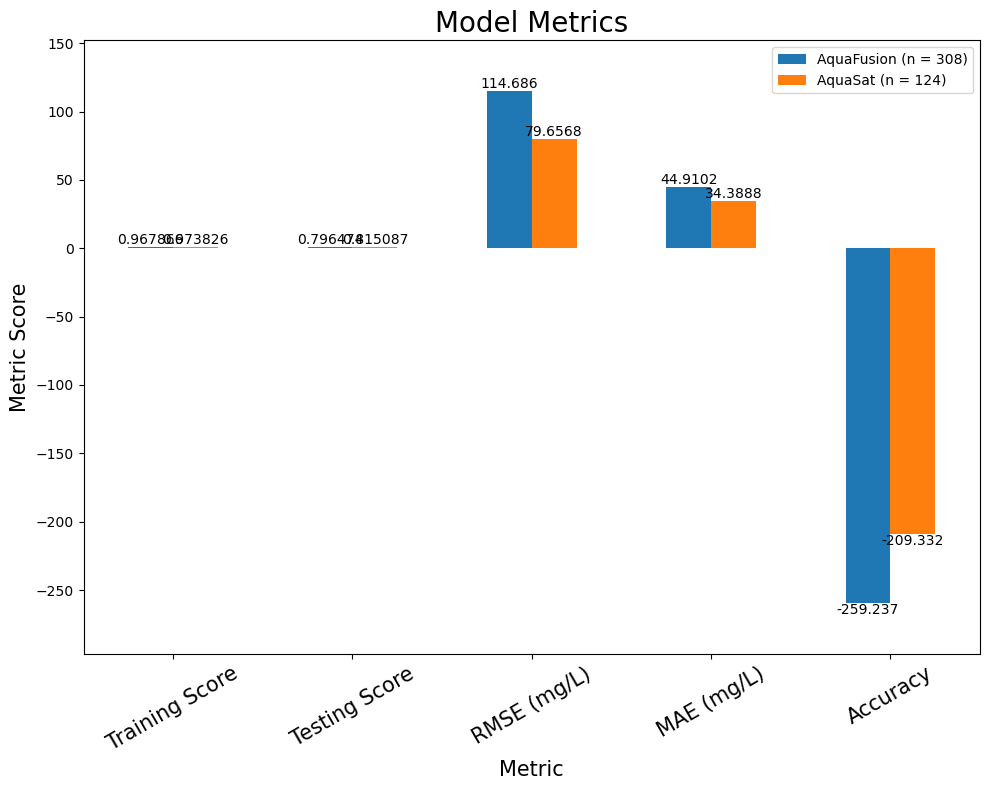

In [86]:
data = {'AquaFusion (n = 308)':[train, test, RMSE_model, errors, accuracy],'AquaSat (n = 124)':[trainA, testA, RMSE_modelA, errorsA, accuracyA]}
metric=pd.DataFrame(['Training Score', 'Testing Score', 'RMSE (mg/L)', 'MAE (mg/L)', 'Accuracy'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame(data)],axis=1)
mod_names = ['AquaFusion (n = 308)', 'AquaSat (n = 124)']

print(df)

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Model Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Metric Score', fontsize = 15)
plt.xlabel('Metric', fontsize = 15)
plt.xticks(rotation = 30, fontsize = 15)
plt.title(label = 'Model Metrics',fontsize = 20)
plt.tight_layout()
plt.show()

In [87]:
#Collect the test set predictions for d-h models

# model_pred = model.predict(X_test)
# model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train), modelA.predict(X_trainA)]

model_test_pred = [model.predict(X_test), modelA.predict(X_testA)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['AquaFusion', 'AquaSat']
metric=pd.DataFrame(['MAE','RMSE'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [14933, 5142]

# Model with some fitted params

In [ ]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

In [ ]:
#define model
model1 = RandomForestRegressor(max_depth = 8, n_estimators = 150, min_samples_split = 2, max_features = 'sqrt', bootstrap = True, oob_score= True, warm_start = False, ccp_alpha = 0, min_impurity_decrease = 0)

In [ ]:
#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)
print('Test Score', model1.score(X_test, y_test))

In [ ]:
#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


## Regressions

In [ ]:
import statsmodels.api as sm
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'

#define predictor and response variables
y = df['tss']
x = df['red']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2253']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss_log']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2221']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(0.01, 1, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')